In [1]:
#### Dependencies and importing libraries: 
#### datetime to use with dates
#### scipy.stats to use run chi square test
#### panda to use dataframes
#### request to use and get json
#### matplotlib.pyplot to plot graphs
#### numpy to make maths calculation
#### pprint to see structure json data

%matplotlib inline
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import scipy.stats as stats
import datetime

In [ ]:
######################################                HYPOTHESIS
#### More car incidents are registered during festive days than during non -  festive days

In [ ]:
#####################################                SOURCE
#### Database of Car Incidents in Mexico city  registered via C-5 (calls) since 2014 is saved in https://datos.cdmx.gob.mx/api/records/1.0/download/?dataset=incidentes-viales-c5&format=json
#### According to web documentation, database contains all car incidents received from “Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano de la Ciudad de México “ .
#### Dates, Location - Lat & Long, Emergency types, weekdays between other information is recorded in Database

In [ ]:
###################################               QUESTIONS 
#### Which day of the week recorded the highest number of car incidents in Mexico City?
#### Is it the same day, the highest number of incidents, for holiday period and non - holiday ones?
#### Is it safer to drive in Mexico City on holidays than on non-holiday days?
#### Where the greatest number of incidents are located?, Which one "Alcaldia"?
#### Is it the same "Alcaldia", where the greatest number of incidents are located for holidays period and non - holidays ones?

In [ ]:
######################################                GETTING DATA SOURCE 

In [ ]:
######## Linking to Urls of CDMX to get data source "https://datos.cdmx.gob.mx/api/records/1.0/download/?dataset=incidentes-viales-c5&format=json"
######## Checking Structure Data via json format
######## Checking size and camps needed for our analysis

In [2]:
#### Linking to Urls ( base_url_search is just some samples, base_url is all data)

base_url_search="https://datos.cdmx.gob.mx/api/records/1.0/search/?dataset=incidentes-viales-c5&rows=10&start=0"
base_url="https://datos.cdmx.gob.mx/api/records/1.0/download/?dataset=incidentes-viales-c5&format=json"

In [5]:
#### Getting data from Urls
response = requests.get(base_url).json()

In [6]:
#### Checking DataSource size
len(response)

1126251

In [7]:
#### Checking Structure Data ( taking some samples to avoid time loss)

response_search=requests.get(base_url_search).json()
pprint(response_search)

{'nhits': 1126251,
 'parameters': {'dataset': ['incidentes-viales-c5'],
                'format': 'json',
                'rows': 10,
                'start': 0,
                'timezone': 'UTC'},
 'records': [{'datasetid': 'incidentes-viales-c5',
              'fields': {'ano': '2014',
                         'clas_con_f_alarma': 'EMERGENCIA',
                         'codigo_cierre': '(A) La unidad de atención a '
                                          'emergencias fue despachada, llegó '
                                          'al lugar de los hechos y confirmó '
                                          'la emergencia reportada',
                         'column_1': 49011,
                         'delegacion_cierre': 'VENUSTIANO CARRANZA',
                         'delegacion_inicio': 'VENUSTIANO CARRANZA',
                         'dia_semana': 'Miércoles',
                         'fecha_cierre': '23/04/2014',
                         'fecha_creacion': '23/04/2014',
     

In [ ]:
##############################                 CLEANING DATA PROCESS


In [ ]:
######## According to the web explanation, codigo_cierre = “A = “Afirmativo”: si se registra un incidente y personal de atención a emergencias confirma la emergencia en el lugar de los hechos” ,  means car incidents really happened, then filtering ["codigo_cierre"] = “A”
######## Creating columns fields to be filled
######## Discarding blank rows ( in any column)
######## Fix the wrong values saved in "dia_semana" column

In [8]:
#### Filtering codigo_cierre = A

response[0]["fields"]["codigo_cierre"]

'(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada'

In [9]:
#####  Columns for fields of the record

ano=[]
clas_con_f_alarma=[]
codigo_cierre=[]
column_1=[]
delegacion_cierre=[]
delegacion_inicio=[]
dia_semana=[]
fecha_cierre=[]
fecha_creacion=[]
folio=[]
geopoint=[]
hora_cierre=[]
hora_creacion=[]
incidente_c4=[]
latitud=[]
longitud=[]
mesdecierre=[]
tipo_entrada=[]
recordid=[]

In [10]:
# Getting only records with (A) status, as part of cleaning process and saving in records_A

cont=0
records_A={}
for i in range(len(response)):
    if "(A)" in response[i]["fields"]["codigo_cierre"]:
        records_A[cont]=response[i]
        cont=cont+1

In [11]:
#### Getting the length of DataSource after filter only records with "(A)"

len(records_A)

512638

In [12]:
#### Checking DataSource after filter applied

cont=0
for i in range(len(records_A)):
    print(records_A[i]["fields"]["delegacion_inicio"] + "and" + records_A[i]["fields"]['folio'] + " " + str(cont))
    cont=cont + 1

VENUSTIANO CARRANZAandC4/140423/01351 0
COYOACANandC4/140423/01373 1
BENITO JUAREZandC4/140423/00500 2
XOCHIMILCOandC4/140423/00518 3
XOCHIMILCOandC4/140423/00501 4
GUSTAVO A. MADEROandC4/140423/01622 5
GUSTAVO A. MADEROandC4/140422/03248 6
ALVARO OBREGONandC4/140422/03231 7
ALVARO OBREGONandC4/140423/00936 8
ALVARO OBREGONandC4/140422/03316 9
CUAUHTEMOCandC4/140423/00610 10
AZCAPOTZALCOandC4/140423/02728 11
CUAUHTEMOCandC4/140423/02548 12
IZTAPALAPAandC4/140423/01802 13
CUAJIMALPAandC4/140423/02101 14
XOCHIMILCOandC4/140423/01809 15
CUAUHTEMOCandC4/140423/02396 16
ALVARO OBREGONandC4/140423/02413 17
BENITO JUAREZandC4/140423/01874 18
ALVARO OBREGONandC4/140423/02437 19
CUAJIMALPAandC4/140423/02183 20
IZTACALCOandC4/140423/01688 21
GUSTAVO A. MADEROandC4/140423/02181 22
BENITO JUAREZandC4/140423/01540 23
IZTAPALAPAandC4/140423/02816 24
ALVARO OBREGONandC4/140423/01900 25
CUAJIMALPAandC4/140423/02198 26
CUAUHTEMOCandC4/140423/01941 27
VENUSTIANO CARRANZAandC4/140423/02421 28
COYOACANand

MIGUEL HIDALGOandC4/151015/01022 1359
BENITO JUAREZandC4/151014/04560 1360
VENUSTIANO CARRANZAandC4/151015/05497 1361
GUSTAVO A. MADEROandGA/180329/06381 1362
ALVARO OBREGONandC5/180329/04255 1363
VENUSTIANO CARRANZAandC5/180329/08372 1364
TLALPANandC5/180329/05894 1365
IZTACALCOandC5/180330/01450 1366
IZTACALCOandC5/180330/05790 1367
CUAUHTEMOCandC5/180330/00523 1368
CUAUHTEMOCandC5/180329/09151 1369
TLAHUACandC5/180330/06544 1370
IZTAPALAPAandC5/180330/02851 1371
IZTAPALAPAandC5/180329/10092 1372
IZTAPALAPAandC5/180329/09991 1373
CUAUHTEMOCandC5/180330/08702 1374
GUSTAVO A. MADEROandC5/180330/01287 1375
CUAUHTEMOCandC5/180330/01895 1376
IZTACALCOandC5/180330/04455 1377
IZTAPALAPAandC5/180329/09660 1378
IZTACALCOandC5/180330/05936 1379
MIGUEL HIDALGOandC5/180330/04524 1380
VENUSTIANO CARRANZAandC5/180330/04167 1381
IZTAPALAPAandC5/180330/08387 1382
VENUSTIANO CARRANZAandC5/180329/09580 1383
COYOACANandC5/180330/06799 1384
COYOACANandC5/180330/03658 1385
TLAHUACandIZ/180330/01986 1386


IZTAPALAPAandC4/140520/02714 2359
MIGUEL HIDALGOandC4/140520/02384 2360
COYOACANandBJ/140520/00068 2361
IZTAPALAPAandC4/140520/01952 2362
AZCAPOTZALCOandC4/140520/02732 2363
TLALPANandC4/140519/03409 2364
MIGUEL HIDALGOandC4/140519/03343 2365
IZTAPALAPAandC4/140520/02233 2366
AZCAPOTZALCOandC4/140520/02212 2367
ALVARO OBREGONandC4/140519/03559 2368
IZTAPALAPAandC4/140520/02371 2369
COYOACANandC4/140520/02246 2370
MIGUEL HIDALGOandC4/140520/02520 2371
IZTAPALAPAandC4/140519/03499 2372
BENITO JUAREZandC4/140520/02300 2373
CUAJIMALPAandC4/140520/02525 2374
AZCAPOTZALCOandC4/140520/02771 2375
GUSTAVO A. MADEROandC4/140520/02534 2376
IZTAPALAPAandC4/140520/02812 2377
BENITO JUAREZandBJ/140521/02559 2378
TLALPANandC4/140520/03815 2379
ALVARO OBREGONandC4/140521/00930 2380
IZTAPALAPAandC4/140521/02114 2381
BENITO JUAREZandC4/140521/00945 2382
CUAUHTEMOCandC4/140521/00757 2383
AZCAPOTZALCOandC4/140521/01773 2384
COYOACANandC4/140521/00771 2385
MIGUEL HIDALGOandC4/140521/02510 2386
IZTAPALAPAan

BENITO JUAREZandC4/140727/04489 3358
VENUSTIANO CARRANZAandC4/140727/04493 3359
CUAUHTEMOCandC4/140727/02919 3360
IZTAPALAPAandC4/140727/02938 3361
MIGUEL HIDALGOandC4/140727/04554 3362
IZTAPALAPAandC4/140727/04763 3363
IZTACALCOandC4/140727/04577 3364
VENUSTIANO CARRANZAandC5/170929/03782 3365
MIGUEL HIDALGOandC5/170929/03402 3366
IZTACALCOandC5/170929/01518 3367
VENUSTIANO CARRANZAandC5/170929/01343 3368
VENUSTIANO CARRANZAandC5/170929/00443 3369
VENUSTIANO CARRANZAandC5/170929/05092 3370
MIGUEL HIDALGOandC5/170929/04685 3371
GUSTAVO A. MADEROandC5/170929/00210 3372
CUAJIMALPAandC5/170929/03687 3373
GUSTAVO A. MADEROandC5/170929/04216 3374
GUSTAVO A. MADEROandC5/170929/00888 3375
COYOACANandC5/170929/03540 3376
MILPA ALTAandC5/170929/07043 3377
MIGUEL HIDALGOandC5/170922/01335 3378
COYOACANandC5/170922/00298 3379
IZTACALCOandC5/170921/05969 3380
IZTAPALAPAandC5/170922/02545 3381
VENUSTIANO CARRANZAandC5/170922/01477 3382
BENITO JUAREZandC5/170922/01888 3383
GUSTAVO A. MADEROandGA/170

BENITO JUAREZandC5/190412/07339 4390
BENITO JUAREZandC5/190412/01832 4391
MIGUEL HIDALGOandC5/190412/02347 4392
CUAUHTEMOCandC5/190412/04040 4393
GUSTAVO A. MADEROandC5/190411/07282 4394
XOCHIMILCOandC5/190411/08081 4395
IZTACALCOandC5/190412/07532 4396
VENUSTIANO CARRANZAandC5/190412/02210 4397
CUAUHTEMOCandC5/190412/06440 4398
CUAUHTEMOCandC5/190412/02153 4399
VENUSTIANO CARRANZAandC5/190412/00459 4400
ALVARO OBREGONandC5/190412/09145 4401
CUAUHTEMOCandC5/190412/04421 4402
CUAUHTEMOCandCH/190412/03084 4403
MIGUEL HIDALGOandAO/190412/03898 4404
COYOACANandC5/190412/01410 4405
TLALPANandBJ/190412/02255 4406
GUSTAVO A. MADEROandGA/190412/06137 4407
CUAJIMALPAandAO/140808/00839 4408
CUAUHTEMOCandC4/140808/01995 4409
GUSTAVO A. MADEROandC4/140808/03554 4410
TLAHUACandC4/140808/02030 4411
IZTACALCOandC4/140808/02907 4412
CUAUHTEMOCandC4/140808/03219 4413
AZCAPOTZALCOandC4/140808/02548 4414
IZTAPALAPAandIZ/140808/02527 4415
TLALPANandC4/140808/03247 4416
TLALPANandC4/140808/02595 4417
CUAUH

CUAUHTEMOCandC4/160116/01668 5704
IZTAPALAPAandC4/160116/05146 5705
ALVARO OBREGONandAO/160116/02842 5706
GUSTAVO A. MADEROandC4/160116/03794 5707
BENITO JUAREZandC4/160116/02131 5708
XOCHIMILCOandC4/160116/02044 5709
XOCHIMILCOandC4/160116/02083 5710
VENUSTIANO CARRANZAandC4/160116/00956 5711
CUAUHTEMOCandC4/160116/03317 5712
CUAJIMALPAandAO/160116/06119 5713
CUAUHTEMOCandC4/160116/05185 5714
GUSTAVO A. MADEROandC4/160115/05930 5715
XOCHIMILCOandC4/160116/02692 5716
VENUSTIANO CARRANZAandC4/160116/03714 5717
MIGUEL HIDALGOandC4/160116/02254 5718
CUAUHTEMOCandCH/160115/04213 5719
BENITO JUAREZandC4/160116/04597 5720
AZCAPOTZALCOandC4/160116/04327 5721
IZTACALCOandC4/160116/03588 5722
VENUSTIANO CARRANZAandC4/160116/03267 5723
XOCHIMILCOandC4/160115/04123 5724
XOCHIMILCOandC4/160116/02732 5725
IZTAPALAPAandC4/160116/00675 5726
MIGUEL HIDALGOandC4/160116/02062 5727
XOCHIMILCOandIZ/160116/01603 5728
CUAUHTEMOCandC4/160116/03958 5729
AZCAPOTZALCOandAO/160115/06053 5730
ALVARO OBREGONandC4/

COYOACANandC4/141215/02829 6357
XOCHIMILCOandC4/141215/04438 6358
MIGUEL HIDALGOandC4/141215/04106 6359
TLALPANandC4/141215/03897 6360
TLALPANandC4/141215/03944 6361
CUAUHTEMOCandC4/141215/04257 6362
XOCHIMILCOandIZ/141215/01262 6363
CUAUHTEMOCandC4/141215/04584 6364
COYOACANandC4/141214/05919 6365
IZTAPALAPAandC4/141215/04541 6366
ALVARO OBREGONandC4/141215/04316 6367
MIGUEL HIDALGOandAO/141215/01144 6368
CUAUHTEMOCandC4/141215/00296 6369
COYOACANandC4/141214/05937 6370
COYOACANandC4/141215/04576 6371
TLALPANandC4/141215/04683 6372
GUSTAVO A. MADEROandC4/141215/04629 6373
CUAUHTEMOCandC4/141215/00691 6374
IZTAPALAPAandC4/141215/00726 6375
MIGUEL HIDALGOandC4/141215/00746 6376
BENITO JUAREZandC4/141215/00816 6377
XOCHIMILCOandC4/141215/01014 6378
CUAUHTEMOCandC4/150224/04082 6379
BENITO JUAREZandC4/150224/00655 6380
MIGUEL HIDALGOandC4/150224/04044 6381
CUAUHTEMOCandC4/150223/04697 6382
IZTACALCOandC4/150223/04803 6383
MIGUEL HIDALGOandC4/150224/04640 6384
CUAUHTEMOCandC4/150224/03805 

COYOACANandC4/150112/00429 7356
GUSTAVO A. MADEROandC4/150112/01441 7357
COYOACANandBJ/150112/01400 7358
GUSTAVO A. MADEROandC4/150112/01727 7359
GUSTAVO A. MADEROandC4/150112/00800 7360
COYOACANandBJ/150112/01664 7361
COYOACANandC4/150112/01453 7362
GUSTAVO A. MADEROandC4/150112/01058 7363
MIGUEL HIDALGOandC4/150112/01132 7364
TLALPANandC4/150112/00517 7365
TLALPANandC4/150112/01458 7366
IZTAPALAPAandC4/150112/00024 7367
TLALPANandC4/150112/01485 7368
CUAUHTEMOCandC4/150112/00098 7369
ALVARO OBREGONandC4/150112/01870 7370
GUSTAVO A. MADEROandC4/150112/00848 7371
MIGUEL HIDALGOandC4/150112/01130 7372
CUAUHTEMOCandC4/150112/00838 7373
IZTAPALAPAandC4/150112/00604 7374
IZTACALCOandC4/150112/00583 7375
IZTAPALAPAandC4/150112/00607 7376
MIGUEL HIDALGOandC4/150111/02217 7377
GUSTAVO A. MADEROandC4/150112/01890 7378
VENUSTIANO CARRANZAandC4/150112/01910 7379
ALVARO OBREGONandC4/150112/02369 7380
GUSTAVO A. MADEROandC4/150112/00885 7381
TLALPANandC4/150112/01953 7382
ALVARO OBREGONandAO/15011

MIGUEL HIDALGOandC5/181221/06936 8356
ALVARO OBREGONandC5/181221/01367 8357
ALVARO OBREGONandC5/181221/05192 8358
IZTAPALAPAandC5/181221/03262 8359
VENUSTIANO CARRANZAandC5/181221/06486 8360
GUSTAVO A. MADEROandC5/181220/09203 8361
BENITO JUAREZandC5/181221/01916 8362
GUSTAVO A. MADEROandC5/181221/05032 8363
VENUSTIANO CARRANZAandC5/181221/00033 8364
COYOACANandC5/181221/06196 8365
MIGUEL HIDALGOandC5/181214/08024 8366
GUSTAVO A. MADEROandC5/181214/05039 8367
IZTAPALAPAandC5/181214/02018 8368
CUAUHTEMOCandC5/181214/01472 8369
CUAUHTEMOCandC5/181214/06329 8370
IZTAPALAPAandC5/181214/05328 8371
AZCAPOTZALCOandC5/181214/05210 8372
GUSTAVO A. MADEROandC4/150110/00742 8373
TLALPANandC4/150110/00770 8374
CUAUHTEMOCandC4/150110/00474 8375
ALVARO OBREGONandC4/150110/01381 8376
GUSTAVO A. MADEROandC4/150109/02065 8377
AZCAPOTZALCOandC4/150110/00161 8378
COYOACANandC4/150110/00213 8379
TLALPANandC4/150110/00881 8380
MIGUEL HIDALGOandC4/150110/00859 8381
IZTACALCOandC4/150110/01790 8382
COYOACANa

VENUSTIANO CARRANZAandC5/181219/07811 9355
ALVARO OBREGONandC5/181219/08157 9356
IZTAPALAPAandC5/181216/04871 9357
TLAHUACandC5/181216/03036 9358
IZTAPALAPAandC5/181216/10813 9359
TLALPANandC5/181216/07834 9360
AZCAPOTZALCOandC5/181216/01064 9361
XOCHIMILCOandC5/181216/06646 9362
AZCAPOTZALCOandC5/181216/06886 9363
CUAUHTEMOCandC5/181216/09843 9364
COYOACANandC5/181216/09586 9365
IZTACALCOandC5/181216/10406 9366
CUAUHTEMOCandC5/181216/05273 9367
IZTAPALAPAandC5/181216/02649 9368
TLALPANandC4/150107/02974 9369
BENITO JUAREZandC4/150107/02750 9370
XOCHIMILCOandC4/150107/03004 9371
ALVARO OBREGONandC4/150107/00909 9372
CUAUHTEMOCandC4/150107/01974 9373
CUAUHTEMOCandC4/150107/01685 9374
BENITO JUAREZandC4/150107/01349 9375
MIGUEL HIDALGOandC4/150107/01361 9376
MIGUEL HIDALGOandC4/150107/00940 9377
AZCAPOTZALCOandAO/150107/00296 9378
MIGUEL HIDALGOandC4/150107/01108 9379
COYOACANandC4/150107/00982 9380
IZTAPALAPAandC4/150106/02145 9381
ALVARO OBREGONandC4/150106/02729 9382
CUAUHTEMOCandC4/1

CUAUHTEMOCandCH/181215/05819 10393
GUSTAVO A. MADEROandC5/181215/00120 10394
VENUSTIANO CARRANZAandC5/181215/01161 10395
IZTAPALAPAandC5/181215/04727 10396
IZTACALCOandC5/181215/00801 10397
BENITO JUAREZandC5/181215/04974 10398
IZTAPALAPAandC5/181215/05988 10399
IZTAPALAPAandIZ/181215/07729 10400
IZTACALCOandC5/181215/02652 10401
IZTACALCOandC5/181214/10323 10402
IZTAPALAPAandC5/181215/03230 10403
CUAUHTEMOCandC5/181215/02486 10404
COYOACANandC5/181216/07908 10405
AZCAPOTZALCOandC5/181216/01351 10406
IZTAPALAPAandC5/181216/04418 10407
AZCAPOTZALCOandAO/150305/01540 10408
AZCAPOTZALCOandC4/150305/01378 10409
MIGUEL HIDALGOandC4/150305/02503 10410
CUAUHTEMOCandC4/150305/01846 10411
VENUSTIANO CARRANZAandC4/150305/00575 10412
IZTACALCOandGA/150305/02581 10413
MIGUEL HIDALGOandC4/150305/02048 10414
COYOACANandC4/150305/03712 10415
COYOACANandC4/150305/03089 10416
GUSTAVO A. MADEROandC4/150305/00836 10417
MIGUEL HIDALGOandC4/150306/03973 10418
COYOACANandC4/150306/03064 10419
BENITO JUAREZa

GUSTAVO A. MADEROandC4/160218/03705 11386
GUSTAVO A. MADEROandC4/160218/02619 11387
IZTAPALAPAandC4/160218/04030 11388
GUSTAVO A. MADEROandC4/160218/03144 11389
AZCAPOTZALCOandC4/160218/01132 11390
BENITO JUAREZandC4/160218/03342 11391
BENITO JUAREZandC4/160218/03096 11392
IZTACALCOandGA/160218/03899 11393
CUAUHTEMOCandCH/160217/05567 11394
AZCAPOTZALCOandC4/160218/01293 11395
GUSTAVO A. MADEROandGA/160218/00898 11396
CUAUHTEMOCandC4/160218/05500 11397
VENUSTIANO CARRANZAandC4/160218/05327 11398
GUSTAVO A. MADEROandC4/160218/04742 11399
IZTACALCOandC4/160218/01157 11400
VENUSTIANO CARRANZAandC4/160218/01160 11401
TLALPANandC4/160218/01045 11402
GUSTAVO A. MADEROandC4/160218/03594 11403
COYOACANandC4/160219/04468 11404
VENUSTIANO CARRANZAandC4/160219/02626 11405
BENITO JUAREZandC4/160218/05355 11406
COYOACANandC4/160219/01466 11407
XOCHIMILCOandC4/160219/00199 11408
VENUSTIANO CARRANZAandC4/160219/04170 11409
ALVARO OBREGONandC4/160219/03345 11410
TLAHUACandC4/160219/01505 11411
COYOACA

CUAJIMALPAandC5/170825/06698 12450
XOCHIMILCOandC5/170825/00046 12451
COYOACANandC5/170825/01227 12452
GUSTAVO A. MADEROandC5/170825/07741 12453
VENUSTIANO CARRANZAandC5/170825/03850 12454
VENUSTIANO CARRANZAandGA/170824/07260 12455
TLALPANandC5/170825/04149 12456
MIGUEL HIDALGOandC5/170825/07352 12457
COYOACANandC5/170824/08023 12458
IZTACALCOandC5/170825/05804 12459
VENUSTIANO CARRANZAandC5/170825/08032 12460
BENITO JUAREZandC5/170825/06087 12461
COYOACANandC5/170825/04758 12462
MIGUEL HIDALGOandCH/170825/03970 12463
TLALPANandC5/170825/05340 12464
CUAUHTEMOCandC5/170825/07011 12465
ALVARO OBREGONandC5/170825/07210 12466
ALVARO OBREGONandC5/170825/03296 12467
ALVARO OBREGONandC5/170825/05744 12468
BENITO JUAREZandBJ/170825/08306 12469
COYOACANandC5/170825/04210 12470
CUAUHTEMOCandC5/170825/00861 12471
COYOACANandC4/151114/04213 12472
GUSTAVO A. MADEROandGA/151113/05065 12473
GUSTAVO A. MADEROandGA/151114/00174 12474
CUAUHTEMOCandC4/151113/05399 12475
GUSTAVO A. MADEROandC4/151114/030

GUSTAVO A. MADEROandC4/151113/00922 13533
AZCAPOTZALCOandC4/151113/00284 13534
TLAHUACandC4/151113/01626 13535
AZCAPOTZALCOandC4/151113/01417 13536
MIGUEL HIDALGOandC4/151113/00518 13537
BENITO JUAREZandC5/180921/02691 13538
BENITO JUAREZandC5/180922/03841 13539
GUSTAVO A. MADEROandC5/180922/04135 13540
CUAUHTEMOCandC5/180922/12202 13541
ALVARO OBREGONandC5/180921/11220 13542
IZTACALCOandC5/180922/04654 13543
GUSTAVO A. MADEROandC5/180921/11524 13544
IZTAPALAPAandC5/180922/07395 13545
BENITO JUAREZandC5/180922/06176 13546
VENUSTIANO CARRANZAandGA/180922/11707 13547
TLAHUACandIZ/180922/10996 13548
CUAUHTEMOCandC5/180922/11228 13549
CUAUHTEMOCandC5/180922/01991 13550
IZTACALCOandC5/180921/11008 13551
COYOACANandC5/180922/04862 13552
GUSTAVO A. MADEROandC5/180922/05341 13553
GUSTAVO A. MADEROandC5/180922/04806 13554
COYOACANandC5/180921/11458 13555
AZCAPOTZALCOandC4/150307/00402 13556
CUAUHTEMOCandC4/150307/03229 13557
TLALPANandC4/150307/03503 13558
CUAJIMALPAandC4/150307/05318 13559
TLA

IZTACALCOandC4/141206/03607 14665
GUSTAVO A. MADEROandC4/141206/04027 14666
MIGUEL HIDALGOandC4/141206/02426 14667
ALVARO OBREGONandC4/141206/03006 14668
GUSTAVO A. MADEROandC4/141206/03137 14669
CUAUHTEMOCandC4/141206/03037 14670
MIGUEL HIDALGOandC4/141206/04125 14671
MIGUEL HIDALGOandC4/141206/02579 14672
GUSTAVO A. MADEROandC4/141206/02572 14673
VENUSTIANO CARRANZAandC4/141206/02433 14674
XOCHIMILCOandC4/141206/03730 14675
BENITO JUAREZandC4/141206/03305 14676
IZTACALCOandC4/141206/03302 14677
MIGUEL HIDALGOandC4/141206/03747 14678
IZTAPALAPAandC4/141206/02609 14679
ALVARO OBREGONandC4/141206/02658 14680
BENITO JUAREZandC4/141206/04723 14681
IZTAPALAPAandC4/141206/02638 14682
COYOACANandC5/170916/05429 14683
COYOACANandC5/170916/10281 14684
AZCAPOTZALCOandC5/170916/08151 14685
IZTACALCOandC5/170916/00665 14686
TLALPANandC5/170916/07542 14687
BENITO JUAREZandBJ/170916/08465 14688
GUSTAVO A. MADEROandGA/170916/07400 14689
CUAUHTEMOCandC5/170915/03309 14690
MIGUEL HIDALGOandC5/170915/0

MILPA ALTAandC5/181101/05645 15497
IZTAPALAPAandC5/181031/01400 15498
IZTAPALAPAandC5/181031/09661 15499
IZTAPALAPAandC5/181101/06030 15500
ALVARO OBREGONandC5/181101/09894 15501
BENITO JUAREZandC5/181101/09238 15502
CUAUHTEMOCandC5/181101/03227 15503
CUAUHTEMOCandC5/181101/05524 15504
COYOACANandC5/181101/06320 15505
BENITO JUAREZandC5/181101/02404 15506
COYOACANandC5/181101/00684 15507
IZTACALCOandC5/181101/05372 15508
CUAUHTEMOCandC5/181101/05912 15509
BENITO JUAREZandC5/181101/01012 15510
IZTACALCOandGA/181102/02674 15511
COYOACANandC5/181102/06115 15512
IZTAPALAPAandIZ/181102/00412 15513
MILPA ALTAandC5/181102/09638 15514
IZTACALCOandGA/181102/02228 15515
BENITO JUAREZandC5/181105/02099 15516
MIGUEL HIDALGOandC5/181105/02888 15517
COYOACANandC5/181105/07612 15518
TLALPANandBJ/181105/05707 15519
ALVARO OBREGONandC5/181105/04402 15520
CUAUHTEMOCandC5/181105/04766 15521
COYOACANandC4/150616/00655 15522
CUAUHTEMOCandC4/150616/00753 15523
GUSTAVO A. MADEROandC4/150616/04573 15524
CUAUH

VENUSTIANO CARRANZAandC4/141215/04220 16614
ALVARO OBREGONandC4/141215/01652 16615
COYOACANandC4/141215/01660 16616
IZTAPALAPAandIZ/141215/01393 16617
GUSTAVO A. MADEROandC4/141215/04266 16618
GUSTAVO A. MADEROandC4/141215/04590 16619
COYOACANandC4/141215/04572 16620
GUSTAVO A. MADEROandC4/141215/04551 16621
GUSTAVO A. MADEROandC4/141215/04548 16622
IZTAPALAPAandC4/141215/04613 16623
GUSTAVO A. MADEROandC4/141215/04694 16624
TLALPANandC4/141215/04690 16625
IZTACALCOandC4/141215/00723 16626
MIGUEL HIDALGOandAO/141214/05319 16627
CUAUHTEMOCandC4/141215/00764 16628
CUAUHTEMOCandC4/141215/00762 16629
BENITO JUAREZandC4/141215/01008 16630
AZCAPOTZALCOandC4/141215/01154 16631
CUAJIMALPAandC4/141215/01194 16632
IZTACALCOandC4/141215/01100 16633
IZTAPALAPAandC4/141214/05456 16634
VENUSTIANO CARRANZAandC4/141215/01208 16635
GUSTAVO A. MADEROandC4/141214/05152 16636
ALVARO OBREGONandC4/141215/01228 16637
MAGDALENA CONTRERASandC4/141215/01285 16638
CUAUHTEMOCandC4/141214/05491 16639
ALVARO OBREGO

VENUSTIANO CARRANZAandC4/141222/03392 17329
MIGUEL HIDALGOandC4/141222/02498 17330
MIGUEL HIDALGOandC4/141222/02247 17331
MIGUEL HIDALGOandC4/141222/02256 17332
CUAUHTEMOCandC4/141222/03372 17333
TLALPANandC4/141222/02506 17334
IZTAPALAPAandC4/141222/02646 17335
MIGUEL HIDALGOandC4/141222/02654 17336
MIGUEL HIDALGOandC4/141222/02589 17337
MIGUEL HIDALGOandC4/141222/02629 17338
MIGUEL HIDALGOandC4/141223/01563 17339
VENUSTIANO CARRANZAandC4/141222/04320 17340
BENITO JUAREZandC4/141222/04436 17341
CUAUHTEMOCandC4/141222/04419 17342
MIGUEL HIDALGOandC4/141223/00180 17343
IZTAPALAPAandC4/141222/04429 17344
CUAUHTEMOCandC4/141223/01599 17345
VENUSTIANO CARRANZAandC4/141223/01619 17346
ALVARO OBREGONandAO/141223/04450 17347
ALVARO OBREGONandAO/141223/00814 17348
AZCAPOTZALCOandC4/141222/04582 17349
TLALPANandC4/141223/01308 17350
ALVARO OBREGONandC4/141222/04639 17351
VENUSTIANO CARRANZAandC4/141222/04668 17352
ALVARO OBREGONandC4/141223/00668 17353
MIGUEL HIDALGOandC4/141222/04686 17354
CUA

GUSTAVO A. MADEROandC4/141130/03561 18001
IZTAPALAPAandC4/141130/01391 18002
ALVARO OBREGONandC4/141130/03004 18003
XOCHIMILCOandC4/141130/04012 18004
COYOACANandC4/141130/05560 18005
IZTAPALAPAandC4/141130/04443 18006
ALVARO OBREGONandC5/171116/02428 18007
GUSTAVO A. MADEROandC5/171116/04919 18008
IZTAPALAPAandIZ/171116/03515 18009
MIGUEL HIDALGOandC5/171116/06988 18010
BENITO JUAREZandC5/171115/05287 18011
CUAJIMALPAandC5/171115/05093 18012
GUSTAVO A. MADEROandC5/171115/06776 18013
MIGUEL HIDALGOandC5/171115/06959 18014
IZTAPALAPAandC5/171115/06090 18015
CUAUHTEMOCandC5/171115/07382 18016
XOCHIMILCOandC5/171115/00494 18017
CUAUHTEMOCandC5/171115/03770 18018
IZTAPALAPAandIZ/171115/02248 18019
GUSTAVO A. MADEROandC5/171115/06438 18020
IZTAPALAPAandC5/171115/03173 18021
ALVARO OBREGONandC5/171115/06985 18022
ALVARO OBREGONandC5/171115/04714 18023
GUSTAVO A. MADEROandC5/171115/04622 18024
IZTAPALAPAandC5/171115/02496 18025
IZTACALCOandGA/171115/06719 18026
MIGUEL HIDALGOandC5/171115/0613

MIGUEL HIDALGOandC5/181212/10441 18894
MIGUEL HIDALGOandC5/181213/03497 18895
MIGUEL HIDALGOandC5/181213/07516 18896
CUAJIMALPAandC5/181213/08898 18897
GUSTAVO A. MADEROandC5/181213/07060 18898
CUAUHTEMOCandC5/181213/08368 18899
AZCAPOTZALCOandC4/150204/03186 18900
ALVARO OBREGONandC4/150204/03217 18901
CUAJIMALPAandC4/150204/03249 18902
COYOACANandC4/150204/03518 18903
COYOACANandC4/150204/03229 18904
MIGUEL HIDALGOandC4/150204/02623 18905
IZTAPALAPAandC4/150204/03541 18906
GUSTAVO A. MADEROandGA/150204/00707 18907
COYOACANandC4/150204/03571 18908
IZTACALCOandC4/150204/03913 18909
CUAUHTEMOCandC4/150204/04230 18910
GUSTAVO A. MADEROandGA/150204/03532 18911
CUAUHTEMOCandC4/150204/04300 18912
BENITO JUAREZandC4/150205/01204 18913
IZTAPALAPAandC4/150205/00822 18914
ALVARO OBREGONandAO/150205/02105 18915
MIGUEL HIDALGOandAO/150205/00756 18916
BENITO JUAREZandC4/150205/00535 18917
BENITO JUAREZandC4/150205/00556 18918
CUAJIMALPAandC4/150205/01227 18919
CUAUHTEMOCandC4/150204/04060 18920
IZ

VENUSTIANO CARRANZAandC4/160311/06916 19899
XOCHIMILCOandC4/160312/06214 19900
VENUSTIANO CARRANZAandC4/160312/04517 19901
IZTACALCOandC4/160312/02370 19902
XOCHIMILCOandC4/160312/04251 19903
BENITO JUAREZandBJ/160312/01725 19904
IZTAPALAPAandC4/160312/06105 19905
BENITO JUAREZandC4/160312/05450 19906
GUSTAVO A. MADEROandC4/160312/00659 19907
XOCHIMILCOandIZ/160312/02561 19908
IZTAPALAPAandIZ/160312/02077 19909
GUSTAVO A. MADEROandC4/160312/00498 19910
GUSTAVO A. MADEROandC4/160312/00784 19911
AZCAPOTZALCOandC4/160312/05251 19912
IZTAPALAPAandC4/160312/05308 19913
CUAJIMALPAandC4/160311/06524 19914
IZTACALCOandC4/160312/03851 19915
AZCAPOTZALCOandC4/160311/07027 19916
GUSTAVO A. MADEROandC4/160312/00662 19917
VENUSTIANO CARRANZAandC4/160312/02472 19918
ALVARO OBREGONandC4/160312/00080 19919
CUAJIMALPAandC4/160312/05446 19920
CUAUHTEMOCandC4/160312/01362 19921
MIGUEL HIDALGOandC5/181210/04279 19922
AZCAPOTZALCOandAO/181210/06804 19923
COYOACANandBJ/181210/06663 19924
VENUSTIANO CARRANZA

ALVARO OBREGONandC5/180203/05338 20896
COYOACANandC5/180203/01641 20897
COYOACANandBJ/180203/07723 20898
IZTAPALAPAandC5/180202/09088 20899
IZTAPALAPAandC5/180202/08861 20900
ALVARO OBREGONandC5/180203/01835 20901
IZTAPALAPAandC5/180203/00787 20902
GUSTAVO A. MADEROandC5/180203/01868 20903
XOCHIMILCOandIZ/180203/01467 20904
ALVARO OBREGONandC5/180203/00054 20905
AZCAPOTZALCOandC5/180203/02132 20906
IZTAPALAPAandC5/180203/07833 20907
IZTAPALAPAandC5/180203/07388 20908
IZTAPALAPAandC5/180203/02234 20909
AZCAPOTZALCOandC5/180203/04213 20910
TLAHUACandC5/180203/07339 20911
ALVARO OBREGONandC5/180203/05374 20912
ALVARO OBREGONandC5/180203/06256 20913
CUAJIMALPAandAO/180203/08662 20914
GUSTAVO A. MADEROandC5/180202/07191 20915
ALVARO OBREGONandC5/180203/08217 20916
MIGUEL HIDALGOandC5/180203/07526 20917
CUAUHTEMOCandCH/180203/05500 20918
IZTAPALAPAandC5/180203/04146 20919
COYOACANandC5/180203/08509 20920
BENITO JUAREZandC5/180203/04999 20921
VENUSTIANO CARRANZAandC5/180203/06190 20922
VENUST

MIGUEL HIDALGOandC5/180201/05852 21697
XOCHIMILCOandC5/180201/08680 21698
GUSTAVO A. MADEROandGA/180201/06095 21699
CUAUHTEMOCandC5/180201/03982 21700
MIGUEL HIDALGOandC5/180204/09508 21701
XOCHIMILCOandC5/180205/01508 21702
ALVARO OBREGONandAO/180204/08706 21703
COYOACANandC5/180204/09067 21704
IZTAPALAPAandC5/180205/00817 21705
CUAJIMALPAandC5/180205/02596 21706
CUAUHTEMOCandCH/180204/09379 21707
VENUSTIANO CARRANZAandGA/180205/01257 21708
MILPA ALTAandC5/180205/01452 21709
TLALPANandC5/180205/06204 21710
XOCHIMILCOandC5/180204/09741 21711
COYOACANandC5/180205/04774 21712
TLAHUACandC4/160307/00942 21713
ALVARO OBREGONandC4/160307/02456 21714
TLALPANandC4/160307/04519 21715
COYOACANandC4/160307/01911 21716
VENUSTIANO CARRANZAandC4/160307/03018 21717
AZCAPOTZALCOandC4/160307/02052 21718
GUSTAVO A. MADEROandGA/160306/05428 21719
VENUSTIANO CARRANZAandC4/160307/04421 21720
IZTAPALAPAandC4/160307/03553 21721
IZTAPALAPAandC4/160307/02726 21722
ALVARO OBREGONandC4/160307/01237 21723
IZTAPAL

MIGUEL HIDALGOandC4/140414/01502 22357
IZTAPALAPAandC4/140414/00404 22358
ALVARO OBREGONandC4/140414/01200 22359
XOCHIMILCOandC4/140414/01569 22360
GUSTAVO A. MADEROandC4/140414/01894 22361
GUSTAVO A. MADEROandC4/140414/02225 22362
GUSTAVO A. MADEROandC4/140414/00077 22363
BENITO JUAREZandC4/140414/01238 22364
MIGUEL HIDALGOandC4/140414/01279 22365
IZTACALCOandC4/140414/01986 22366
CUAUHTEMOCandC4/140414/01281 22367
ALVARO OBREGONandC4/140414/01255 22368
TLALPANandC4/140414/01582 22369
AZCAPOTZALCOandC4/140414/02306 22370
GUSTAVO A. MADEROandC4/140414/01992 22371
ALVARO OBREGONandC4/140414/01294 22372
MIGUEL HIDALGOandC4/140414/02314 22373
GUSTAVO A. MADEROandC4/140414/00195 22374
IZTACALCOandC4/140413/04812 22375
CUAUHTEMOCandC4/140413/05093 22376
TLALPANandC4/140413/05012 22377
IZTAPALAPAandC4/140414/02088 22378
IZTAPALAPAandC4/140414/03264 22379
AZCAPOTZALCOandC4/140413/05140 22380
VENUSTIANO CARRANZAandC4/140414/03255 22381
TLALPANandC4/140414/03746 22382
MIGUEL HIDALGOandC4/140414

COYOACANandC4/150326/04084 23848
TLALPANandC4/150326/03022 23849
IZTACALCOandC4/150326/02360 23850
TLALPANandC4/150327/03879 23851
IZTACALCOandC4/150327/04504 23852
IZTACALCOandC4/150327/02231 23853
CUAUHTEMOCandC4/150326/04859 23854
AZCAPOTZALCOandC4/150327/00788 23855
IZTAPALAPAandC4/150327/03481 23856
TLALPANandC4/150327/03883 23857
IZTAPALAPAandC4/150327/00192 23858
TLALPANandC4/150327/02090 23859
IZTACALCOandC4/150327/02016 23860
BENITO JUAREZandC4/150327/03180 23861
VENUSTIANO CARRANZAandGA/150327/02444 23862
MIGUEL HIDALGOandC4/150327/04293 23863
IZTAPALAPAandC4/150327/03502 23864
MIGUEL HIDALGOandC4/150327/04252 23865
BENITO JUAREZandC4/150327/00512 23866
VENUSTIANO CARRANZAandC4/150327/02582 23867
MIGUEL HIDALGOandCH/150327/01487 23868
GUSTAVO A. MADEROandC4/150326/04601 23869
XOCHIMILCOandC4/150327/02970 23870
GUSTAVO A. MADEROandC4/150327/04792 23871
ALVARO OBREGONandC4/150327/01677 23872
IZTAPALAPAandC4/150327/02118 23873
CUAUHTEMOCandC4/150326/04309 23874
ALVARO OBREGONand

BENITO JUAREZandBJ/180929/05610 24847
TLALPANandC5/180929/07127 24848
CUAJIMALPAandC5/180929/04398 24849
AZCAPOTZALCOandC4/150328/01516 24850
GUSTAVO A. MADEROandC4/150328/03327 24851
ALVARO OBREGONandC4/150328/03783 24852
CUAUHTEMOCandCH/150328/03657 24853
GUSTAVO A. MADEROandC4/150328/03388 24854
AZCAPOTZALCOandC4/150328/02487 24855
MAGDALENA CONTRERASandC4/150328/04337 24856
CUAUHTEMOCandC4/150328/03287 24857
GUSTAVO A. MADEROandC4/150328/01439 24858
TLALPANandC4/150328/01104 24859
TLALPANandC4/150327/04915 24860
BENITO JUAREZandC4/150328/00702 24861
AZCAPOTZALCOandC4/150328/02297 24862
MIGUEL HIDALGOandC4/150327/04957 24863
AZCAPOTZALCOandC4/150328/00209 24864
XOCHIMILCOandC4/150328/02022 24865
CUAUHTEMOCandC4/150328/00145 24866
IZTAPALAPAandC4/150327/04869 24867
IZTAPALAPAandC4/150328/03536 24868
BENITO JUAREZandC4/150328/00689 24869
VENUSTIANO CARRANZAandC4/150328/00738 24870
CUAJIMALPAandC4/150328/01660 24871
GUSTAVO A. MADEROandC4/150328/00686 24872
TLALPANandC4/150328/04069 24

VENUSTIANO CARRANZAandGA/150926/00309 25847
MILPA ALTAandC4/150927/02679 25848
TLALPANandC4/150927/02217 25849
CUAUHTEMOCandC4/150927/04276 25850
BENITO JUAREZandC4/150927/03940 25851
BENITO JUAREZandC4/150927/00637 25852
IZTACALCOandC4/150927/04894 25853
TLALPANandC4/150927/04071 25854
MAGDALENA CONTRERASandC4/150927/01741 25855
VENUSTIANO CARRANZAandGA/150927/05653 25856
COYOACANandC4/150927/01833 25857
AZCAPOTZALCOandC4/150927/01886 25858
ALVARO OBREGONandC4/150927/04034 25859
TLALPANandC4/150926/06045 25860
GUSTAVO A. MADEROandC4/150927/02327 25861
BENITO JUAREZandBJ/150927/02366 25862
AZCAPOTZALCOandC4/150927/04976 25863
ALVARO OBREGONandC4/150927/01742 25864
IZTAPALAPAandC4/150927/03550 25865
VENUSTIANO CARRANZAandC4/150927/00305 25866
IZTAPALAPAandC4/150927/02071 25867
GUSTAVO A. MADEROandGA/150927/01454 25868
GUSTAVO A. MADEROandGA/150926/04048 25869
IZTAPALAPAandC4/150927/00164 25870
CUAUHTEMOCandCH/181001/02059 25871
XOCHIMILCOandC5/181001/01106 25872
TLAHUACandC5/181001/0886

IZTACALCOandC4/150928/00132 26846
BENITO JUAREZandC4/150928/01612 26847
IZTACALCOandC4/150927/04331 26848
COYOACANandC4/150928/00744 26849
GUSTAVO A. MADEROandC4/150928/00904 26850
IZTAPALAPAandC4/150928/01125 26851
ALVARO OBREGONandC4/150928/01966 26852
CUAJIMALPAandC4/150928/03177 26853
IZTAPALAPAandC4/150928/03133 26854
AZCAPOTZALCOandC4/150928/00545 26855
XOCHIMILCOandC4/150928/04436 26856
CUAUHTEMOCandC4/150928/03724 26857
ALVARO OBREGONandAO/150928/04827 26858
GUSTAVO A. MADEROandC4/150928/04221 26859
VENUSTIANO CARRANZAandC4/150928/03897 26860
IZTAPALAPAandC4/150929/00460 26861
IZTAPALAPAandC4/150929/01261 26862
IZTAPALAPAandC4/150929/03386 26863
COYOACANandC4/150929/00951 26864
IZTAPALAPAandC4/150929/00784 26865
IZTAPALAPAandIZ/150929/02908 26866
CUAUHTEMOCandC5/181115/05568 26867
TLALPANandBJ/181115/07032 26868
IZTAPALAPAandC5/181115/01363 26869
IZTAPALAPAandC5/181115/09067 26870
BENITO JUAREZandC5/181115/06767 26871
CUAUHTEMOCandC5/181115/03017 26872
MILPA ALTAandIZ/181115/02

GUSTAVO A. MADEROandC5/181113/03135 27888
AZCAPOTZALCOandC5/181113/04621 27889
AZCAPOTZALCOandC5/181113/01690 27890
ALVARO OBREGONandC5/181113/04606 27891
MIGUEL HIDALGOandC4/150611/01524 27892
AZCAPOTZALCOandC4/150611/02974 27893
TLALPANandC4/150611/03317 27894
CUAJIMALPAandC4/150611/05303 27895
GUSTAVO A. MADEROandC4/150611/04270 27896
IZTACALCOandC4/150611/00886 27897
GUSTAVO A. MADEROandC4/150611/04778 27898
MIGUEL HIDALGOandC4/150611/01030 27899
TLAHUACandC4/150611/03829 27900
GUSTAVO A. MADEROandC4/150611/01072 27901
CUAUHTEMOCandC4/150611/01398 27902
BENITO JUAREZandBJ/150611/01775 27903
XOCHIMILCOandC4/150610/05706 27904
ALVARO OBREGONandC4/150610/05233 27905
BENITO JUAREZandC4/150611/00977 27906
TLAHUACandC4/150611/01347 27907
TLAHUACandC4/150611/02278 27908
ALVARO OBREGONandC4/150611/00692 27909
GUSTAVO A. MADEROandC4/150611/01178 27910
MIGUEL HIDALGOandC4/150611/00010 27911
AZCAPOTZALCOandC4/150611/00135 27912
VENUSTIANO CARRANZAandC4/150611/05161 27913
GUSTAVO A. MADEROandC

MIGUEL HIDALGOandC4/151204/04977 28845
TLALPANandC4/151204/01251 28846
MILPA ALTAandC4/151204/05303 28847
BENITO JUAREZandC4/151204/03704 28848
CUAUHTEMOCandC4/151204/00238 28849
VENUSTIANO CARRANZAandC4/151205/04031 28850
IZTAPALAPAandC4/151205/02075 28851
MAGDALENA CONTRERASandC4/151205/00278 28852
TLALPANandBJ/151205/03097 28853
IZTAPALAPAandC4/151201/01776 28854
MIGUEL HIDALGOandAO/151201/03683 28855
GUSTAVO A. MADEROandC4/151202/01386 28856
TLALPANandC5/181116/06149 28857
IZTAPALAPAandC5/181116/03757 28858
MIGUEL HIDALGOandC5/181115/08242 28859
ALVARO OBREGONandC5/181116/06327 28860
TLAHUACandC5/181116/00352 28861
COYOACANandC5/181116/03042 28862
ALVARO OBREGONandC5/181116/02584 28863
IZTAPALAPAandC5/181116/07826 28864
COYOACANandC5/181116/02679 28865
MIGUEL HIDALGOandC5/181116/09132 28866
GUSTAVO A. MADEROandGA/181116/04520 28867
BENITO JUAREZandC5/181115/06110 28868
BENITO JUAREZandC5/181115/09669 28869
IZTACALCOandC5/181116/02507 28870
ALVARO OBREGONandC5/181116/02693 28871
MIG

IZTAPALAPAandC4/141021/01663 30064
MIGUEL HIDALGOandC4/141021/01134 30065
TLAHUACandC4/141021/02200 30066
VENUSTIANO CARRANZAandC4/141021/02172 30067
TLALPANandC4/141016/02634 30068
ALVARO OBREGONandC4/141021/02969 30069
BENITO JUAREZandC4/141021/00492 30070
TLALPANandC4/141021/00872 30071
MIGUEL HIDALGOandC4/141021/03717 30072
GUSTAVO A. MADEROandC4/141021/00836 30073
IZTAPALAPAandC4/141021/00558 30074
MIGUEL HIDALGOandC4/141021/03704 30075
COYOACANandC4/141021/02240 30076
VENUSTIANO CARRANZAandGA/141021/01582 30077
IZTAPALAPAandC4/141021/03757 30078
CUAUHTEMOCandC4/141021/03034 30079
CUAUHTEMOCandC4/141021/03016 30080
IZTAPALAPAandC4/141021/00542 30081
BENITO JUAREZandC4/141021/02350 30082
CUAUHTEMOCandC4/141021/02999 30083
IZTAPALAPAandC4/141021/03073 30084
AZCAPOTZALCOandC4/141021/03083 30085
TLAHUACandC4/141021/03068 30086
AZCAPOTZALCOandC4/141021/02714 30087
IZTAPALAPAandC4/141021/02345 30088
CUAUHTEMOCandCH/141021/02391 30089
GUSTAVO A. MADEROandGA/141021/02570 30090
IZTAPALAPAa

VENUSTIANO CARRANZAandC4/150127/00611 31334
MIGUEL HIDALGOandC4/150127/02121 31335
TLAHUACandC4/150126/04068 31336
IZTACALCOandC4/150126/04187 31337
GUSTAVO A. MADEROandC4/150127/00649 31338
CUAUHTEMOCandC4/150127/02569 31339
MIGUEL HIDALGOandC4/150127/01656 31340
GUSTAVO A. MADEROandC4/150127/02145 31341
MIGUEL HIDALGOandC4/150127/01659 31342
TLALPANandC4/150127/02149 31343
AZCAPOTZALCOandC4/150127/00657 31344
GUSTAVO A. MADEROandC4/150127/02540 31345
CUAUHTEMOCandC4/150127/02555 31346
IZTAPALAPAandC4/150127/02550 31347
CUAUHTEMOCandC4/150127/00711 31348
COYOACANandC4/150127/00707 31349
CUAUHTEMOCandC4/150127/02530 31350
COYOACANandC4/150127/03352 31351
COYOACANandC4/150127/03364 31352
CUAUHTEMOCandC4/150127/02656 31353
GUSTAVO A. MADEROandC4/150127/02668 31354
GUSTAVO A. MADEROandC4/150127/01822 31355
TLALPANandC4/150127/02702 31356
GUSTAVO A. MADEROandC4/150127/02680 31357
TLALPANandC4/150127/02686 31358
GUSTAVO A. MADEROandC4/150127/04134 31359
IZTAPALAPAandC4/150127/03055 31360
CO

IZTAPALAPAandC4/160212/04546 32344
TLALPANandC4/160212/04204 32345
BENITO JUAREZandC4/160212/05244 32346
VENUSTIANO CARRANZAandC4/160212/05086 32347
ALVARO OBREGONandC4/160212/00278 32348
CUAUHTEMOCandC4/160212/03318 32349
IZTAPALAPAandIZ/160212/04913 32350
CUAUHTEMOCandC4/160212/04343 32351
VENUSTIANO CARRANZAandC4/160212/02029 32352
TLAHUACandC4/160212/03792 32353
CUAJIMALPAandAO/160212/04089 32354
IZTAPALAPAandC4/160212/00166 32355
GUSTAVO A. MADEROandC4/160212/04419 32356
IZTACALCOandC4/160212/04005 32357
GUSTAVO A. MADEROandC4/160212/00026 32358
GUSTAVO A. MADEROandC4/160212/05619 32359
CUAUHTEMOCandC4/160212/04901 32360
BENITO JUAREZandC4/160212/03136 32361
IZTAPALAPAandIZ/160212/05189 32362
BENITO JUAREZandC4/160212/00674 32363
MILPA ALTAandC4/160212/04899 32364
CUAUHTEMOCandC4/160212/03028 32365
VENUSTIANO CARRANZAandGA/160212/03987 32366
VENUSTIANO CARRANZAandC5/181202/07085 32367
IZTAPALAPAandC5/181202/06467 32368
CUAUHTEMOCandCH/181202/06277 32369
CUAUHTEMOCandC5/181202/0876

BENITO JUAREZandC5/180112/04523 33629
BENITO JUAREZandC5/180112/06056 33630
ALVARO OBREGONandC5/180112/02468 33631
BENITO JUAREZandC5/180111/07831 33632
MAGDALENA CONTRERASandC5/180112/07376 33633
VENUSTIANO CARRANZAandC5/180112/00002 33634
IZTACALCOandC5/180112/04753 33635
CUAUHTEMOCandC5/180112/04674 33636
ALVARO OBREGONandC5/180112/05885 33637
MIGUEL HIDALGOandC5/180112/07370 33638
VENUSTIANO CARRANZAandC5/180112/03129 33639
VENUSTIANO CARRANZAandC5/180112/05263 33640
VENUSTIANO CARRANZAandC5/180112/01409 33641
TLAHUACandIZ/161201/02999 33642
GUSTAVO A. MADEROandGA/161201/05704 33643
COYOACANandC5/161201/02938 33644
ALVARO OBREGONandC5/161201/01723 33645
MILPA ALTAandC5/161201/03430 33646
COYOACANandC5/161201/01059 33647
TLALPANandC5/161201/05257 33648
IZTAPALAPAandC5/161201/05298 33649
IZTACALCOandC5/161201/03921 33650
GUSTAVO A. MADEROandC5/161201/03302 33651
BENITO JUAREZandC5/161201/05283 33652
COYOACANandC5/161201/05436 33653
TLAHUACandIZ/160206/05842 33654
TLAHUACandIZ/160205/

MIGUEL HIDALGOandC4/150404/05657 34843
CUAUHTEMOCandC4/150404/02322 34844
GUSTAVO A. MADEROandC4/150404/05727 34845
CUAUHTEMOCandC4/150405/01255 34846
GUSTAVO A. MADEROandC4/150405/03511 34847
CUAUHTEMOCandC4/150405/01009 34848
CUAUHTEMOCandC4/150404/06535 34849
MIGUEL HIDALGOandC4/150405/03579 34850
VENUSTIANO CARRANZAandC4/150404/06197 34851
AZCAPOTZALCOandC4/150405/03606 34852
IZTAPALAPAandC4/150405/04396 34853
IZTAPALAPAandC4/150405/02090 34854
CUAUHTEMOCandCH/150405/01501 34855
COYOACANandC4/150404/05558 34856
IZTAPALAPAandIZ/150405/03019 34857
ALVARO OBREGONandC4/150404/06250 34858
CUAUHTEMOCandC4/150405/02485 34859
CUAUHTEMOCandC4/150405/00777 34860
TLALPANandC4/150404/06926 34861
IZTACALCOandC4/140325/02865 34862
BENITO JUAREZandC4/140325/02080 34863
MIGUEL HIDALGOandC4/140325/00624 34864
BENITO JUAREZandC4/140325/02898 34865
MIGUEL HIDALGOandC4/140325/00863 34866
CUAUHTEMOCandC4/140325/02932 34867
MIGUEL HIDALGOandC4/140325/03142 34868
MIGUEL HIDALGOandAO/140325/00987 34869
AL

IZTAPALAPAandC4/150409/03735 36118
GUSTAVO A. MADEROandC4/150409/01591 36119
IZTACALCOandC4/150409/03826 36120
TLALPANandC4/150409/04400 36121
COYOACANandC4/150409/02593 36122
GUSTAVO A. MADEROandC4/150409/04644 36123
ALVARO OBREGONandC4/150409/02890 36124
CUAUHTEMOCandC4/150409/03280 36125
IZTAPALAPAandC4/150409/00873 36126
COYOACANandC4/150409/01508 36127
CUAUHTEMOCandC4/150409/02299 36128
BENITO JUAREZandC4/150409/03723 36129
VENUSTIANO CARRANZAandC4/150409/03450 36130
CUAUHTEMOCandC4/150409/01461 36131
TLALPANandC4/150409/01200 36132
CUAUHTEMOCandC4/150409/00015 36133
GUSTAVO A. MADEROandC4/150409/03705 36134
CUAUHTEMOCandC4/150409/02727 36135
IZTAPALAPAandC4/150409/01964 36136
MIGUEL HIDALGOandC4/150409/01265 36137
CUAUHTEMOCandC4/150409/00773 36138
GUSTAVO A. MADEROandC4/150409/03754 36139
ALVARO OBREGONandC4/150409/04538 36140
IZTAPALAPAandC4/150409/03823 36141
ALVARO OBREGONandC4/150409/03991 36142
IZTAPALAPAandC4/150409/01154 36143
AZCAPOTZALCOandC4/150409/02159 36144
TLALPANa

CUAUHTEMOCandCH/150902/00439 37342
BENITO JUAREZandBJ/150902/03066 37343
MIGUEL HIDALGOandAO/150902/05248 37344
BENITO JUAREZandC4/150901/03182 37345
VENUSTIANO CARRANZAandC4/150902/02139 37346
CUAUHTEMOCandC4/150902/02560 37347
MIGUEL HIDALGOandC4/150902/01165 37348
CUAUHTEMOCandC4/150902/01883 37349
IZTAPALAPAandC4/150902/02426 37350
MIGUEL HIDALGOandC4/150902/00317 37351
BENITO JUAREZandC4/150902/00483 37352
CUAUHTEMOCandC4/150902/00404 37353
MIGUEL HIDALGOandC4/150902/01152 37354
VENUSTIANO CARRANZAandC4/150902/00600 37355
CUAUHTEMOCandC4/150902/03798 37356
BENITO JUAREZandC4/150902/04755 37357
VENUSTIANO CARRANZAandGA/150902/02477 37358
CUAJIMALPAandC4/150902/00742 37359
COYOACANandC4/150902/05392 37360
ALVARO OBREGONandAO/181011/02555 37361
IZTAPALAPAandC5/181011/02333 37362
GUSTAVO A. MADEROandC5/181011/01599 37363
TLALPANandC5/181011/03890 37364
GUSTAVO A. MADEROandC5/181011/04918 37365
CUAUHTEMOCandC5/181011/00116 37366
CUAUHTEMOCandC5/181011/00164 37367
CUAUHTEMOCandC5/181011

GUSTAVO A. MADEROandC5/170405/01850 38565
AZCAPOTZALCOandC5/170405/01697 38566
IZTACALCOandC5/170405/04684 38567
IZTAPALAPAandC5/170405/00192 38568
AZCAPOTZALCOandC5/170404/07857 38569
BENITO JUAREZandC5/170405/04623 38570
MIGUEL HIDALGOandC5/170405/02547 38571
VENUSTIANO CARRANZAandC5/170404/04073 38572
IZTAPALAPAandC5/170405/01518 38573
MIGUEL HIDALGOandC5/170405/06183 38574
CUAUHTEMOCandC5/170405/03544 38575
MIGUEL HIDALGOandC5/170405/02494 38576
COYOACANandC5/170405/05672 38577
IZTAPALAPAandC5/170405/06117 38578
IZTACALCOandC5/170405/03496 38579
IZTAPALAPAandIZ/170404/08011 38580
CUAUHTEMOCandCH/170405/06261 38581
IZTAPALAPAandC5/170405/04150 38582
CUAUHTEMOCandC5/170405/07947 38583
IZTAPALAPAandC5/170405/01719 38584
TLAHUACandC5/170405/03373 38585
AZCAPOTZALCOandC5/170405/01965 38586
XOCHIMILCOandC5/170405/06381 38587
BENITO JUAREZandBJ/170405/07657 38588
COYOACANandBJ/170405/04991 38589
GUSTAVO A. MADEROandC5/170405/05502 38590
IZTAPALAPAandC4/150910/03026 38591
AZCAPOTZALCOandC4

ALVARO OBREGONandC4/141231/02727 39515
IZTAPALAPAandC4/141231/02720 39516
XOCHIMILCOandC4/141231/02734 39517
IZTAPALAPAandC4/141231/02802 39518
IZTAPALAPAandC4/141231/03387 39519
GUSTAVO A. MADEROandC4/141231/02705 39520
ALVARO OBREGONandC4/141231/03481 39521
MILPA ALTAandC4/141231/03781 39522
MILPA ALTAandC4/141231/03801 39523
COYOACANandC4/141231/03871 39524
COYOACANandC4/140207/02311 39525
CUAUHTEMOCandC4/140316/04452 39526
IZTAPALAPAandC4/140413/04060 39527
IZTAPALAPAandC4/140809/04376 39528
AZCAPOTZALCOandC4/140824/04218 39529
IZTAPALAPAandC4/140915/01224 39530
IZTACALCOandC4/141009/03480 39531
TLAHUACandC4/141116/04111 39532
COYOACANandC4/141219/04230 39533
VENUSTIANO CARRANZAandC4/140101/02638 39534
VENUSTIANO CARRANZAandC4/140101/03948 39535
VENUSTIANO CARRANZAandC4/140101/03037 39536
GUSTAVO A. MADEROandC4/140101/03553 39537
GUSTAVO A. MADEROandC4/140101/03540 39538
BENITO JUAREZandC4/140101/02620 39539
IZTAPALAPAandC4/140101/03496 39540
BENITO JUAREZandC4/140101/00647 39541
C

GUSTAVO A. MADEROandC4/141209/01547 40526
CUAUHTEMOCandC4/141209/01554 40527
GUSTAVO A. MADEROandC4/141209/02319 40528
COYOACANandC4/141209/02329 40529
GUSTAVO A. MADEROandC4/141209/03286 40530
IZTAPALAPAandC4/141209/01942 40531
VENUSTIANO CARRANZAandC4/141209/02340 40532
VENUSTIANO CARRANZAandC4/141209/01984 40533
IZTAPALAPAandC4/141209/01647 40534
IZTAPALAPAandC4/141209/02998 40535
GUSTAVO A. MADEROandC4/141209/01657 40536
IZTAPALAPAandC4/141209/03399 40537
IZTAPALAPAandC4/141209/01675 40538
CUAJIMALPAandC4/141209/02994 40539
IZTAPALAPAandC4/141209/02030 40540
ALVARO OBREGONandC4/141209/03453 40541
BENITO JUAREZandC4/141209/03475 40542
IZTAPALAPAandC4/141209/02444 40543
GUSTAVO A. MADEROandC4/141209/03478 40544
COYOACANandC4/141209/03517 40545
CUAUHTEMOCandC4/141209/03715 40546
BENITO JUAREZandC4/141209/04023 40547
ALVARO OBREGONandC4/141209/01716 40548
BENITO JUAREZandC4/141209/03534 40549
COYOACANandC4/141209/02626 40550
CUAUHTEMOCandC4/141209/04179 40551
CUAJIMALPAandC4/141209/031

IZTAPALAPAandC4/151020/02036 41567
IZTAPALAPAandC4/151020/00815 41568
VENUSTIANO CARRANZAandC4/151020/01559 41569
MIGUEL HIDALGOandC4/151020/02526 41570
BENITO JUAREZandC4/151021/01300 41571
BENITO JUAREZandC4/151021/02280 41572
IZTAPALAPAandC4/151021/01284 41573
IZTAPALAPAandC4/151021/01239 41574
MIGUEL HIDALGOandC4/151020/05221 41575
TLALPANandC4/151021/02290 41576
MIGUEL HIDALGOandC4/151021/02265 41577
ALVARO OBREGONandC4/151021/03381 41578
IZTAPALAPAandIZ/151021/03556 41579
MAGDALENA CONTRERASandC4/151021/03957 41580
MIGUEL HIDALGOandC4/151021/00810 41581
COYOACANandC4/151021/03703 41582
CUAUHTEMOCandC4/151021/04346 41583
TLALPANandC4/151021/02316 41584
CUAUHTEMOCandC4/151021/02641 41585
AZCAPOTZALCOandC4/151021/01213 41586
COYOACANandC4/151021/02834 41587
AZCAPOTZALCOandAO/151021/01758 41588
CUAUHTEMOCandC4/151020/05145 41589
VENUSTIANO CARRANZAandC4/151021/01571 41590
ALVARO OBREGONandC4/151021/02501 41591
VENUSTIANO CARRANZAandGA/151021/04785 41592
ALVARO OBREGONandC4/151021/041

AZCAPOTZALCOandC5/181120/04577 42755
CUAUHTEMOCandC5/181120/08848 42756
CUAUHTEMOCandC5/181120/08569 42757
BENITO JUAREZandBJ/181120/04784 42758
BENITO JUAREZandC5/181120/08126 42759
XOCHIMILCOandBJ/181120/00318 42760
IZTAPALAPAandC5/181120/05464 42761
IZTACALCOandC5/181120/04411 42762
GUSTAVO A. MADEROandC5/181120/06807 42763
MIGUEL HIDALGOandC5/181120/02597 42764
GUSTAVO A. MADEROandC5/181120/02009 42765
VENUSTIANO CARRANZAandGA/181120/08187 42766
BENITO JUAREZandC5/181120/02017 42767
VENUSTIANO CARRANZAandC5/181120/04167 42768
BENITO JUAREZandC5/181121/01838 42769
BENITO JUAREZandC5/181121/05088 42770
AZCAPOTZALCOandC5/181121/01381 42771
ALVARO OBREGONandC4/141215/03805 42772
CUAUHTEMOCandC4/141215/03857 42773
CUAUHTEMOCandC4/141215/02823 42774
IZTAPALAPAandC4/141215/03558 42775
ALVARO OBREGONandC4/141215/03577 42776
COYOACANandC4/141215/03527 42777
GUSTAVO A. MADEROandC4/141128/02945 42778
VENUSTIANO CARRANZAandC4/141128/01615 42779
CUAUHTEMOCandC4/141128/02602 42780
CUAUHTEMOCandC

MIGUEL HIDALGOandC5/180112/02706 43839
VENUSTIANO CARRANZAandC5/180112/01997 43840
VENUSTIANO CARRANZAandGA/180112/05000 43841
CUAUHTEMOCandC5/180112/04417 43842
VENUSTIANO CARRANZAandC5/180112/00398 43843
ALVARO OBREGONandC5/180112/05507 43844
IZTAPALAPAandC5/180112/04083 43845
IZTAPALAPAandC5/180112/04958 43846
IZTAPALAPAandC5/180112/05630 43847
BENITO JUAREZandC5/180112/05539 43848
ALVARO OBREGONandC5/180112/05107 43849
IZTAPALAPAandC5/180111/08159 43850
CUAUHTEMOCandC5/180112/01591 43851
CUAUHTEMOCandC5/180112/02975 43852
BENITO JUAREZandC5/180112/00137 43853
IZTAPALAPAandC5/180115/03252 43854
CUAUHTEMOCandC5/180115/07398 43855
CUAUHTEMOCandCH/180115/06867 43856
MAGDALENA CONTRERASandC4/150223/02181 43857
MIGUEL HIDALGOandC4/150223/04028 43858
TLALPANandC4/150223/00766 43859
CUAUHTEMOCandC4/150223/01052 43860
CUAUHTEMOCandC4/150223/03256 43861
GUSTAVO A. MADEROandC4/150223/03077 43862
CUAUHTEMOCandC4/150223/01104 43863
TLALPANandC4/150223/03598 43864
BENITO JUAREZandC4/150223/01472

IZTAPALAPAandC4/151230/04909 45115
CUAUHTEMOCandC4/151231/03048 45116
CUAUHTEMOCandC4/151231/03157 45117
GUSTAVO A. MADEROandGA/151231/01281 45118
GUSTAVO A. MADEROandGA/151231/01764 45119
GUSTAVO A. MADEROandC4/150314/03279 45120
TLALPANandC4/150322/05775 45121
COYOACANandC4/150422/01453 45122
ALVARO OBREGONandC4/150729/01039 45123
TLALPANandC4/151010/03336 45124
ALVARO OBREGONandC4/151204/03034 45125
ALVARO OBREGONandC4/151222/03592 45126
TLAHUACandIZ/151222/03540 45127
GUSTAVO A. MADEROandGA/151222/02571 45128
IZTAPALAPAandC4/151222/03661 45129
GUSTAVO A. MADEROandC4/151222/02539 45130
GUSTAVO A. MADEROandC4/151222/02543 45131
VENUSTIANO CARRANZAandC4/151221/02826 45132
CUAUHTEMOCandC4/151221/05125 45133
CUAUHTEMOCandCH/151222/01743 45134
COYOACANandC4/151222/04624 45135
ALVARO OBREGONandC4/151222/00162 45136
COYOACANandC4/151222/04729 45137
IZTACALCOandC4/151221/04613 45138
ALVARO OBREGONandC4/151221/05362 45139
MIGUEL HIDALGOandC4/151222/00190 45140
IZTAPALAPAandC4/151222/04105 45

MAGDALENA CONTRERASandC4/151225/04685 45857
MAGDALENA CONTRERASandC4/151225/01181 45858
VENUSTIANO CARRANZAandGA/151225/06739 45859
CUAJIMALPAandC4/151225/04461 45860
BENITO JUAREZandC4/151225/06702 45861
IZTAPALAPAandC4/151225/02745 45862
BENITO JUAREZandC4/151225/04215 45863
GUSTAVO A. MADEROandC4/151225/01355 45864
TLAHUACandC4/151225/01679 45865
COYOACANandBJ/151226/01258 45866
IZTAPALAPAandC4/151226/00031 45867
TLALPANandC4/151226/02048 45868
COYOACANandC4/151226/01432 45869
VENUSTIANO CARRANZAandC4/151226/03252 45870
COYOACANandC4/151226/02448 45871
ALVARO OBREGONandC4/151226/01004 45872
CUAUHTEMOCandC4/151226/01516 45873
CUAJIMALPAandC4/151226/03554 45874
MAGDALENA CONTRERASandC4/151226/03846 45875
CUAUHTEMOCandC4/151226/00921 45876
XOCHIMILCOandC4/151226/02822 45877
AZCAPOTZALCOandC4/151225/06632 45878
GUSTAVO A. MADEROandC4/151226/01904 45879
MIGUEL HIDALGOandC4/151226/00855 45880
ALVARO OBREGONandC4/151226/01447 45881
COYOACANandBJ/151226/02084 45882
BENITO JUAREZandC4/151226

BENITO JUAREZandC4/151227/02210 46945
CUAUHTEMOCandC4/151227/04308 46946
TLAHUACandC4/151227/04795 46947
GUSTAVO A. MADEROandC4/151227/04705 46948
ALVARO OBREGONandC4/151227/03109 46949
COYOACANandBJ/151227/05342 46950
GUSTAVO A. MADEROandC4/151227/02503 46951
MIGUEL HIDALGOandC4/151227/00862 46952
CUAUHTEMOCandC4/151227/03085 46953
IZTACALCOandC4/151227/02820 46954
VENUSTIANO CARRANZAandC4/151227/01734 46955
TLALPANandC4/151227/05551 46956
IZTAPALAPAandC4/151228/02116 46957
IZTAPALAPAandIZ/151228/01402 46958
GUSTAVO A. MADEROandC4/151228/02066 46959
IZTAPALAPAandC4/151228/00842 46960
GUSTAVO A. MADEROandC4/151228/02462 46961
VENUSTIANO CARRANZAandC4/151228/02398 46962
TLALPANandC4/151228/02006 46963
GUSTAVO A. MADEROandGA/151228/04796 46964
IZTACALCOandC4/151227/05479 46965
GUSTAVO A. MADEROandC5/180502/03640 46966
CUAUHTEMOCandCH/180502/04647 46967
XOCHIMILCOandC5/180503/05212 46968
GUSTAVO A. MADEROandC5/180503/06916 46969
XOCHIMILCOandIZ/180503/02512 46970
COYOACANandC5/180503/0311

AZCAPOTZALCOandC4/141215/01090 48337
AZCAPOTZALCOandC4/141214/05437 48338
XOCHIMILCOandC4/141215/00513 48339
TLALPANandC4/141215/00878 48340
IZTAPALAPAandC4/141214/05630 48341
MIGUEL HIDALGOandC4/141215/00545 48342
IZTAPALAPAandIZ/141214/03962 48343
TLALPANandC4/141216/01093 48344
CUAJIMALPAandC4/141216/00806 48345
VENUSTIANO CARRANZAandC4/141216/01132 48346
CUAUHTEMOCandC4/141216/00839 48347
MIGUEL HIDALGOandC4/141216/00958 48348
ALVARO OBREGONandAO/141216/00724 48349
MIGUEL HIDALGOandC4/141216/00830 48350
VENUSTIANO CARRANZAandC4/141216/00532 48351
GUSTAVO A. MADEROandC4/141216/01148 48352
IZTAPALAPAandC4/141216/00854 48353
CUAUHTEMOCandC4/141216/01163 48354
BENITO JUAREZandC4/141216/01474 48355
ALVARO OBREGONandAO/141216/03386 48356
CUAUHTEMOCandC4/141216/01242 48357
MIGUEL HIDALGOandC4/141216/01253 48358
TLALPANandC4/141216/00914 48359
TLALPANandBJ/141215/04437 48360
TLALPANandC4/141216/00289 48361
MIGUEL HIDALGOandC4/141216/01882 48362
AZCAPOTZALCOandC4/141216/00651 48363
TLALPANa

IZTACALCOandC5/180502/02383 49265
ALVARO OBREGONandC5/180502/03760 49266
GUSTAVO A. MADEROandC5/180501/08327 49267
ALVARO OBREGONandC5/180502/07534 49268
BENITO JUAREZandC5/180502/02597 49269
MAGDALENA CONTRERASandC5/180502/08188 49270
IZTACALCOandC5/180502/00197 49271
COYOACANandBJ/180502/01234 49272
GUSTAVO A. MADEROandC5/180502/02727 49273
COYOACANandC5/180502/01636 49274
MIGUEL HIDALGOandC5/180501/08514 49275
IZTAPALAPAandC5/180502/02082 49276
TLALPANandC5/180501/08166 49277
MIGUEL HIDALGOandC5/180502/08779 49278
TLALPANandC5/180502/01676 49279
IZTAPALAPAandC5/180502/01479 49280
IZTAPALAPAandIZ/180502/06115 49281
XOCHIMILCOandC4/150507/03807 49282
IZTAPALAPAandC4/150507/00591 49283
ALVARO OBREGONandC4/150507/01393 49284
ALVARO OBREGONandC4/150508/00305 49285
VENUSTIANO CARRANZAandC4/150508/02623 49286
XOCHIMILCOandC4/150508/00964 49287
COYOACANandC4/150508/02546 49288
CUAUHTEMOCandC4/150508/01357 49289
BENITO JUAREZandC4/150508/03437 49290
COYOACANandC4/150508/04595 49291
ALVARO OB

IZTAPALAPAandC4/150114/00139 50363
GUSTAVO A. MADEROandC4/150114/01463 50364
VENUSTIANO CARRANZAandC4/150114/00386 50365
ALVARO OBREGONandC4/150114/00756 50366
VENUSTIANO CARRANZAandC4/150114/00118 50367
GUSTAVO A. MADEROandC4/150114/00131 50368
ALVARO OBREGONandC4/150114/00831 50369
MIGUEL HIDALGOandC4/150114/01618 50370
COYOACANandC4/150114/01632 50371
CUAUHTEMOCandC4/150114/00790 50372
ALVARO OBREGONandC4/150114/01629 50373
CUAUHTEMOCandC4/150114/02748 50374
GUSTAVO A. MADEROandC5/180815/07941 50375
MIGUEL HIDALGOandC5/180815/07966 50376
BENITO JUAREZandC5/180815/07994 50377
IZTACALCOandC5/180815/09135 50378
BENITO JUAREZandC5/180815/09230 50379
TLALPANandC5/180815/09051 50380
AZCAPOTZALCOandC5/180815/10126 50381
CUAUHTEMOCandC5/180815/08512 50382
CUAUHTEMOCandCH/180814/04850 50383
CUAUHTEMOCandCH/180815/10206 50384
CUAUHTEMOCandCH/180815/03239 50385
GUSTAVO A. MADEROandGA/180815/04041 50386
IZTAPALAPAandIZ/180815/08682 50387
IZTAPALAPAandIZ/180815/07191 50388
IZTACALCOandGA/180815/

XOCHIMILCOandC4/140204/01210 51835
MIGUEL HIDALGOandC4/140204/02140 51836
COYOACANandC4/140204/02541 51837
ALVARO OBREGONandC4/140204/02244 51838
VENUSTIANO CARRANZAandC4/140204/02294 51839
CUAUHTEMOCandC4/140204/02257 51840
COYOACANandC4/140204/02697 51841
BENITO JUAREZandC4/140204/02297 51842
MIGUEL HIDALGOandC4/140204/02374 51843
COYOACANandC4/140204/02391 51844
COYOACANandC4/140204/02509 51845
COYOACANandC4/140204/02954 51846
IZTACALCOandC4/140204/02802 51847
VENUSTIANO CARRANZAandC4/140204/01500 51848
IZTAPALAPAandC4/140204/01594 51849
CUAUHTEMOCandC4/140204/02948 51850
VENUSTIANO CARRANZAandC4/140204/03633 51851
CUAUHTEMOCandCH/140204/01092 51852
COYOACANandC4/140204/01868 51853
CUAUHTEMOCandCH/140204/01328 51854
BENITO JUAREZandC4/140204/03463 51855
VENUSTIANO CARRANZAandGA/140204/00874 51856
VENUSTIANO CARRANZAandC4/140204/01998 51857
IZTAPALAPAandC4/140204/02039 51858
ALVARO OBREGONandC4/140204/02033 51859
BENITO JUAREZandC4/140204/02189 51860
IZTAPALAPAandIZ/140204/00713 5186

IZTAPALAPAandC4/150419/05585 52939
BENITO JUAREZandC4/150419/04187 52940
MIGUEL HIDALGOandC4/150419/06425 52941
XOCHIMILCOandC4/150419/04262 52942
VENUSTIANO CARRANZAandC4/150419/04700 52943
COYOACANandC4/150419/04323 52944
GUSTAVO A. MADEROandGA/150419/06175 52945
VENUSTIANO CARRANZAandC4/150419/05498 52946
IZTAPALAPAandIZ/150419/05141 52947
GUSTAVO A. MADEROandGA/150419/00208 52948
AZCAPOTZALCOandC4/150419/06463 52949
BENITO JUAREZandC4/150419/06673 52950
GUSTAVO A. MADEROandC4/150419/06544 52951
BENITO JUAREZandC4/150419/06688 52952
BENITO JUAREZandC4/150419/06685 52953
VENUSTIANO CARRANZAandGA/150419/02722 52954
ALVARO OBREGONandC4/150419/06316 52955
ALVARO OBREGONandC4/150419/05147 52956
GUSTAVO A. MADEROandC4/150419/05942 52957
AZCAPOTZALCOandC4/150419/05897 52958
TLALPANandC5/180812/08316 52959
ALVARO OBREGONandC5/180812/10770 52960
CUAUHTEMOCandC5/180812/00041 52961
TLALPANandC5/180812/02281 52962
CUAJIMALPAandC5/180812/05611 52963
CUAUHTEMOCandC5/180812/08766 52964
BENITO JUAR

KeyError: 'delegacion_inicio'

In [13]:
#### Calculating the number of keys of the fields camp per each item. Taking record = 53542 as a sample

pprint(records_A[53542])
cont_k=0
for key in records_A[53542]["fields"].items():
    cont_k=cont_k+1
print(f"Tiene {cont_k} keys")

{'datasetid': 'incidentes-viales-c5',
 'fields': {'ano': '2018',
            'clas_con_f_alarma': 'EMERGENCIA',
            'codigo_cierre': '(A) La unidad de atención a emergencias fue '
                             'despachada, llegó al lugar de los hechos y '
                             'confirmó la emergencia reportada',
            'column_1': 919465,
            'delegacion_cierre': 'GUSTAVO A. MADERO',
            'dia_semana': 'Sábado',
            'fecha_cierre': '11/08/2018',
            'fecha_creacion': '11/08/2018',
            'folio': 'C5/180811/01836',
            'geopoint': [19.50288003, -99.15712992],
            'hora_cierre': '05:48:00',
            'hora_creacion': '05:15:00',
            'incidente_c4': 'accidente-choque sin lesionados',
            'latitud': 19.50288003,
            'longitud': -99.15712992,
            'mesdecierre': 'Agosto',
            'tipo_entrada': 'LLAMADA DEL 911'},
 'geometry': {'coordinates': [-99.15712992, 19.50288003], 'type': 'Po

In [14]:
# Getting only the records with the complete keys/columns as a part of cleaning process and saving in records_A_clean

cont=0
records_A_clean={}
for i in range(len(records_A)):
    cont_k=0
    for key in records_A[i]["fields"].items():
        cont_k=cont_k+1
    if cont_k==18:
        records_A_clean[cont]=records_A[i]
        cont=cont+1
len(records_A_clean)

477324

In [15]:
# Fill columns that will be used in Dataframe

for i in range(len(records_A_clean)):
    ano.append(records_A_clean[i]["fields"]["ano"])
    clas_con_f_alarma.append(records_A_clean[i]["fields"]["clas_con_f_alarma"])
    codigo_cierre.append(records_A_clean[i]["fields"]["codigo_cierre"])
    column_1.append(records_A_clean[i]["fields"]["column_1"])
    delegacion_cierre.append(records_A_clean[i]["fields"]["delegacion_cierre"])
    delegacion_inicio.append(records_A_clean[i]["fields"]["delegacion_inicio"])
    dia_semana.append(records_A_clean[i]["fields"]["dia_semana"])
    fecha_cierre.append(records_A_clean[i]["fields"]["fecha_cierre"])
    fecha_creacion.append(records_A_clean[i]["fields"]["fecha_creacion"])
    folio.append(records_A_clean[i]["fields"]["folio"])
    geopoint.append(records_A_clean[i]["fields"]["geopoint"])
    hora_cierre.append(records_A_clean[i]["fields"]["hora_cierre"])
    hora_creacion.append(records_A_clean[i]["fields"]["hora_creacion"])
    incidente_c4.append(records_A_clean[i]["fields"]["incidente_c4"])
    latitud.append(records_A_clean[i]["fields"]["latitud"])
    longitud.append(records_A_clean[i]["fields"]["longitud"])
    mesdecierre.append(records_A_clean[i]["fields"]["mesdecierre"])
    tipo_entrada.append(records_A_clean[i]["fields"]["tipo_entrada"])
    recordid.append(records_A_clean[i]["recordid"])

In [16]:
#### Checking length of DataFrame created

len(recordid)

477324

In [17]:
#### Creating DataFrame with the columns filled in the above steps. Dataframe will be name = incvial_df

incvial_df = pd.DataFrame({
    "año":ano,
    "clas_con_f_alarma":clas_con_f_alarma,
    "codigo_cierre":codigo_cierre,
    "column_1":column_1,
    "delegacion_cierre":delegacion_cierre,
    "delegacion_inicio":delegacion_inicio,
    "dia_semana":dia_semana,
    "fecha_cierre":fecha_cierre,
    "fecha_creacion":fecha_creacion,
    "folio":folio,
    "geopoint":geopoint,
    "hora_cierre":hora_cierre,
    "hora_creacion":hora_creacion,
    "incidente_c4":incidente_c4,
    "latitud":latitud,
    "longitud":longitud,
    "mes_cierre":mesdecierre,
    "tipo_entrada":tipo_entrada,
    "recordid":recordid
})

incvial_df.head()

año  clas_con_f_alarma                                      codigo_cierre  \
0  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   
1  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   
2  2014  URGENCIAS MEDICAS  (A) La unidad de atención a emergencias fue de...   
3  2014  URGENCIAS MEDICAS  (A) La unidad de atención a emergencias fue de...   
4  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   

   column_1    delegacion_cierre    delegacion_inicio dia_semana fecha_cierre  \
0     49011  VENUSTIANO CARRANZA  VENUSTIANO CARRANZA  Miércoles   23/04/2014   
1     49016             COYOACAN             COYOACAN  Miércoles   23/04/2014   
2     49033        BENITO JUAREZ        BENITO JUAREZ  Miércoles   23/04/2014   
3     49036              TLAHUAC           XOCHIMILCO  Miércoles   23/04/2014   
4     49038           XOCHIMILCO           XOCHIMILCO  Miércoles   23/04/2014   

  fecha_creacion            folio               geopoint hora_cierre  \
0     23/04/2014  C4/140423/01351   [19.42557, -99.1198]    13:27:19   
1     23/04/2014  C4/140423/01373  [19.30598, -99.11206]    15:18:03   
2     23/04/2014  C4/140423/00500   [19.38208, -99.1787]    08:52:05   
3     23/04/2014  C4/140423/00518    [19.251, -99.00768]    09:17:00   
4     23/04/2014  C4/140423/00501  [19.26791, -99.11653]    12:31:31   

  hora_creacion                     incidente_c4   latitud  longitud  \
0      13:24:18  accidente-choque sin lesionados  19.42557 -99.11980   
1      13:29:50  accidente-choque sin lesionados  19.30598 -99.11206   
2      07:33:18  accidente-choque con lesionados  19.38208 -99.17870   
3      07:38:45            lesionado-atropellado  19.25100 -99.00768   
4      07:32:16  accidente-choque sin lesionados  19.26791 -99.11653   

  mes_cierre     tipo_entrada                                  recordid  
0      Abril  LLAMADA DEL 066  6d63fc24381b2d4ac4d27e3cc37f92feb2839626  
1      Abril  LLAMADA DEL 066  0521d665fec3d9097cdf0e3900f0d5e7013a3a86  
2      Abril  LLAMADA DEL 066  65f3f59539b64f21aebf0cc83286439a856e4b79  
3      Abril  LLAMADA DEL 066  254c90939e411789fd20920f435b4adad00faead  
4      Abril  LLAMADA DEL 066  5cfa1f221e849c8a8f37fc79c7792c52024cc3c3

In [18]:
#### Checking values of "fecha_creacion" column
len(incvial_df["fecha_creacion"].unique())

1826

In [19]:
#### Somes "dia_semana" are wrong, then , selecting which ones "dia_semana" are wrong to fix them

df_group=incvial_df.groupby("fecha_creacion")
df_ds=pd.DataFrame(df_group["dia_semana"].value_counts())
df_ds=df_ds.rename(columns={"dia_semana":"count"})
df_ds=df_ds.reset_index()
df_ds["fecha_creacion"].count()
df_ds=df_ds.loc[:,{"fecha_creacion","dia_semana"}]
df_ds_g=df_ds.groupby("fecha_creacion")
df_ds2=pd.DataFrame(df_ds_g["dia_semana"].count())
df_ds2=df_ds2.rename(columns={"dia_semana":"count"})
df_ds2.loc[df_ds2["count"]>1]

count
fecha_creacion       
01/04/2018          2
02/04/2017          2
03/04/2016          2
05/04/2015          2
06/04/2014          2
17/09/2015          2
24/10/2015          2
25/10/2014          2
27/10/2018          2
28/10/2017          2
29/10/2016          2

In [20]:
#### Converting date in number format to be groupped in Festive period
inc_vial_df=incvial_df.copy()
d_week=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
for fecha in list((df_ds2.loc[df_ds2["count"]>1]).index.values):
    #print(inc_vial_df.loc[inc_vial_df["fecha_creacion"]==fecha,"dia_semana"].count())
    day_select=datetime.datetime(int(fecha.split("/")[2]),int(fecha.split("/")[1]),int(fecha.split("/")[0])).weekday()
    #print(day_select)
    #print(d_week[day_select])
    inc_vial_df.loc[inc_vial_df["fecha_creacion"]==fecha,"dia_semana"]=d_week[day_select]
#inc_vial_df.loc[inc_vial_df["fecha_creacion"]=="01/04/2018","dia_semana"]

In [ ]:
###############################         DATA ANALYSIS

In [ ]:
#### Converting date in number format to be groupped in festive period
#### Calculating number of weekdays in the DataSource after cleaning proccess and saving one copy of it.
#### Calculating average number of car incidents in each weekdays vs average value 
#### Calculating the critical value
#### Running the chi square test with stats.chisquare() to know if data is "statistically significant"
#### Getting first plot, bar plot "Number of Incidents vs Weekdays" 
#### Getting second plot, bar plot named "Avg Incidents per each weekday - Festive vs Non Festive"
#### Getting third plot, pie plot named  " % Incidents during festive days per each weekdays"
#### Getting fourth plot, pie plot named ""% Incidents during Non- festive days per each weekdays"
#### Getting TOP 3 of "Delegacion" per each Festive & Non Festive days 

In [19]:
#### Checking types of column 
inc_vial_df.dtypes

año                   object
clas_con_f_alarma     object
codigo_cierre         object
column_1               int64
delegacion_cierre     object
delegacion_inicio     object
dia_semana            object
fecha_cierre          object
fecha_creacion        object
folio                 object
geopoint              object
hora_cierre           object
hora_creacion         object
incidente_c4          object
latitud              float64
longitud             float64
mes_cierre            object
tipo_entrada          object
recordid              object
dtype: object

In [21]:
#### Checking number of rows of each column 
inc_vial_df.count()

año                  477324
clas_con_f_alarma    477324
codigo_cierre        477324
column_1             477324
delegacion_cierre    477324
delegacion_inicio    477324
dia_semana           477324
fecha_cierre         477324
fecha_creacion       477324
folio                477324
geopoint             477324
hora_cierre          477324
hora_creacion        477324
incidente_c4         477324
latitud              477324
longitud             477324
mes_cierre           477324
tipo_entrada         477324
recordid             477324
dtype: int64

In [22]:
#### Calculating number of "Lunes","Martes", etc in the DataSource after cleaning proccess and saving in incvial_gday
incvial_gday=inc_vial_df.groupby("dia_semana")
incvial_gday["dia_semana"].count().sort_values()

dia_semana
Domingo      58589
Lunes        64134
Martes       67753
Jueves       68963
Miércoles    69023
Sábado       70902
Viernes      77960
Name: dia_semana, dtype: int64

In [23]:
#### Calculating Expected value = Average of Number of Incident by day
#### Creating dataframe name "incvial_gday_df" with average vs number of inccident per date
incvial_gday_df=pd.DataFrame(incvial_gday["dia_semana"].count())
incvial_gday_df["expected"]=incvial_gday_df["dia_semana"].mean()
incvial_gday_df=incvial_gday_df.rename(columns={"dia_semana":"observed"})
incvial_gday_df

observed      expected
dia_semana                        
Domingo        58589  68189.142857
Jueves         68963  68189.142857
Lunes          64134  68189.142857
Martes         67753  68189.142857
Miércoles      69023  68189.142857
Sábado         70902  68189.142857
Viernes        77960  68189.142857

In [24]:
#### Calculating the critical value
#### The degree of freedom is 7-1 = 6
#### With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
critical_value

12.591587243743977

In [25]:
#### Run the chi square test with stats.chisquare(), it give us the result is statistically significant
stats.chisquare(incvial_gday_df['observed'], incvial_gday_df['expected'])

Power_divergenceResult(statistic=3122.4994762467427, pvalue=0.0)

Text(0.5, 1.0, 'Number of Incidents vs Weekdays')

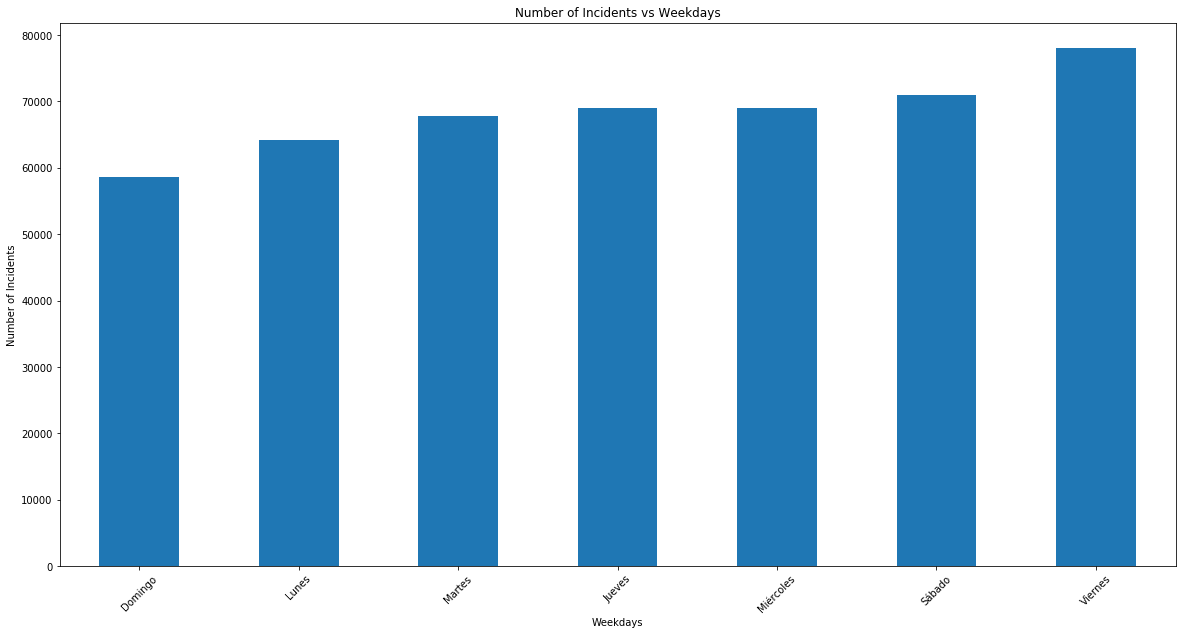

In [26]:
#### Ploting Graphs "Number of Incidents vs Weekdays " , shows us the Friday is the date with more accident registered
incvial_gday_df["observed"].sort_values().plot.bar(figsize=(20,10))
plt.xlabel('Weekdays')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.title("Number of Incidents vs Weekdays")

In [27]:
#### Copying DataSource and named as "incvial_dates", this will be our DataFrame cleaned
incvial_dates=inc_vial_df.copy()
incvial_dates.head()

año  clas_con_f_alarma                                      codigo_cierre  \
0  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   
1  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   
2  2014  URGENCIAS MEDICAS  (A) La unidad de atención a emergencias fue de...   
3  2014  URGENCIAS MEDICAS  (A) La unidad de atención a emergencias fue de...   
4  2014         EMERGENCIA  (A) La unidad de atención a emergencias fue de...   

   column_1    delegacion_cierre    delegacion_inicio dia_semana fecha_cierre  \
0     49011  VENUSTIANO CARRANZA  VENUSTIANO CARRANZA  Miércoles   23/04/2014   
1     49016             COYOACAN             COYOACAN  Miércoles   23/04/2014   
2     49033        BENITO JUAREZ        BENITO JUAREZ  Miércoles   23/04/2014   
3     49036              TLAHUAC           XOCHIMILCO  Miércoles   23/04/2014   
4     49038           XOCHIMILCO           XOCHIMILCO  Miércoles   23/04/2014   

  fecha_creacion            folio               geopoint hora_cierre  \
0     23/04/2014  C4/140423/01351   [19.42557, -99.1198]    13:27:19   
1     23/04/2014  C4/140423/01373  [19.30598, -99.11206]    15:18:03   
2     23/04/2014  C4/140423/00500   [19.38208, -99.1787]    08:52:05   
3     23/04/2014  C4/140423/00518    [19.251, -99.00768]    09:17:00   
4     23/04/2014  C4/140423/00501  [19.26791, -99.11653]    12:31:31   

  hora_creacion                     incidente_c4   latitud  longitud  \
0      13:24:18  accidente-choque sin lesionados  19.42557 -99.11980   
1      13:29:50  accidente-choque sin lesionados  19.30598 -99.11206   
2      07:33:18  accidente-choque con lesionados  19.38208 -99.17870   
3      07:38:45            lesionado-atropellado  19.25100 -99.00768   
4      07:32:16  accidente-choque sin lesionados  19.26791 -99.11653   

  mes_cierre     tipo_entrada                                  recordid  
0      Abril  LLAMADA DEL 066  6d63fc24381b2d4ac4d27e3cc37f92feb2839626  
1      Abril  LLAMADA DEL 066  0521d665fec3d9097cdf0e3900f0d5e7013a3a86  
2      Abril  LLAMADA DEL 066  65f3f59539b64f21aebf0cc83286439a856e4b79  
3      Abril  LLAMADA DEL 066  254c90939e411789fd20920f435b4adad00faead  
4      Abril  LLAMADA DEL 066  5cfa1f221e849c8a8f37fc79c7792c52024cc3c3

In [28]:
#### Calculating the first date and the last date from our DataDrame cleaned (incvial_dates)
fecha_search=[]
#ano_search=[]
#mesdia_search=[]
for row in range(len(incvial_dates)):
    fecha=[]
    fecha=incvial_dates.loc[row,"fecha_creacion"].split("/")
    #ano_search.append(int(fecha[2]))
    #mesdia_search.append(int(fecha[1])*100 + int(fecha[0]))
    fecha_search.append(int(fecha[2])*10000 + int(fecha[1])*100 + int(fecha[0]))

In [29]:
print(f"Mínima fecha de creación es: {min(fecha_search)} y máxima: {max(fecha_search)}")

Mínima fecha de creación es: 20131231 y máxima: 20181230


In [30]:
#### Adding fecha_search in the incvial_dates Dataframe 
incvial_dates["fecha_search"]=fecha_search
#incvial_dates["ano_search"]=ano_search
#incvial_dates["mesdia_search"]=mesdia_search
incvial_dates.sort_values(["fecha_search"]).head()

año  clas_con_f_alarma  \
38812   2014         EMERGENCIA   
199240  2014  URGENCIAS MEDICAS   
199239  2014         EMERGENCIA   
188251  2014  URGENCIAS MEDICAS   
128240  2014  URGENCIAS MEDICAS   

                                            codigo_cierre  column_1  \
38812   (A) La unidad de atención a emergencias fue de...        88   
199240  (A) La unidad de atención a emergencias fue de...        36   
199239  (A) La unidad de atención a emergencias fue de...        38   
188251  (A) La unidad de atención a emergencias fue de...       521   
128240  (A) La unidad de atención a emergencias fue de...       123   

       delegacion_cierre delegacion_inicio dia_semana fecha_cierre  \
38812         CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199240        CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199239        XOCHIMILCO        XOCHIMILCO     Martes   01/01/2014   
188251     BENITO JUAREZ     BENITO JUAREZ     Martes   02/01/2014   
128240        IZTAPALAPA        IZTAPALAPA     Martes   01/01/2014   

       fecha_creacion            folio               geopoint hora_cierre  \
38812      31/12/2013  C4/131231/03536  [19.45311, -99.16031]    00:12:07   
199240     31/12/2013  C4/131231/02969  [19.43104, -99.16353]    00:52:11   
199239     31/12/2013  C4/131231/02936  [19.28258, -99.12622]    07:05:08   
188251     31/12/2013  C4/131231/01471  [19.38867, -99.18856]    11:47:53   
128240     31/12/2013  IZ/131231/03523  [19.33554, -98.99204]    02:16:04   

       hora_creacion                     incidente_c4   latitud  longitud  \
38812       23:33:54  accidente-choque sin lesionados  19.45311 -99.16031   
199240      21:16:55  accidente-choque con lesionados  19.43104 -99.16353   
199239      21:09:11  accidente-choque sin lesionados  19.28258 -99.12622   
188251      13:53:24  accidente-choque con lesionados  19.38867 -99.18856   
128240      23:29:23  accidente-choque con lesionados  19.33554 -98.99204   

       mes_cierre     tipo_entrada                                  recordid  \
38812       Enero  LLAMADA DEL 066  63e2a190b0b741401b365480fb9f039eafb27659   
199240      Enero            RADIO  fde8c6912a2e404502c423da8c6e8dd2b1f061eb   
199239      Enero  LLAMADA DEL 066  f1744eab18f519458f14eabea74abbe20f359510   
188251      Enero  LLAMADA DEL 066  aa6a891a7dd4594bb2b04752c5aa1e78bfa946a9   
128240      Enero            RADIO  a3772fe46c08c211967b8dedf7bf3a6b4e98a3a2   

        fecha_search  
38812       20131231  
199240      20131231  
199239      20131231  
188251      20131231  
128240      20131231

In [31]:
# Creating the bins in which Data will be held, They refer to the main Festive period in Mexico City
bins = [20131222,20140106,20140417,20140421,20140501,20140502,20140715,20140818,20140915,20140917,20141222,20150106,
        20150402,20150406,20150501,20150502,20150714,20150825,20150915,20150917,20151222,20160106,20160324,20160328,
        20160501,20160502,20160715,20160823,20160915,20160917,20161219,20170107,20170413,20170417,20170501,20170502,
        20170727,20170821,20170915,20170917,20171221,20180106,20180329,20180402,20180501,20180502,20180725,20180821,
        20180915,20180917,20181220,20190105]
len(bins)

52

In [32]:
# Creating the names for the bins ( They refer to the main Festive period in Mexico City) saving in group_names
group_names = ["fin de año_2014","normal_1_2014","semana santa_2014","normal_2_2014","dia del trabajo_2014","normal_3_2014",
               "verano_2014","normal_4_2014","independencia_2014","normal_5_2014","fin de año_2015","normal_1_2015",
               "semana santa_2015","normal_2_2015","dia del trabajo_2015","normal_3_2015","verano_2015","normal_4_2015",
               "independencia_2015","normal_5_2015","fin de año_2016","normal_1_2016","semana santa_2016","normal_2_2106",
               "dia del trabajo_2016","normal_3_2016","verano_2016","normal_4_2016","independencia_2016","normal_5_2016",
               "fin de año_2017","normal_1_2017","semana santa_2017","normal_2_2017","dia del trabajo_2017","normal_3_2017",
               "verano_2017","normal_4_2017","independencia_2017","normal_5_2017","fin de año_2018","normal_1_2018",
               "semana santa_2018","normal_2_2018","dia del trabajo_2018","normal_3_2018","verano_2018","normal_4_2018",
               "independencia_2018","normal_5_2018","fin de año_2019"]
len(group_names)

51

In [33]:
#### Adding fecha_group column to incvial_dates Dataframe where show if the incident is inside of festive period or not
incvial_dates["fecha_group"] = pd.cut(incvial_dates["fecha_search"], bins, labels=group_names)
incvial_dates.sort_values(["fecha_search"]).head()

año  clas_con_f_alarma  \
38812   2014         EMERGENCIA   
199240  2014  URGENCIAS MEDICAS   
199239  2014         EMERGENCIA   
188251  2014  URGENCIAS MEDICAS   
128240  2014  URGENCIAS MEDICAS   

                                            codigo_cierre  column_1  \
38812   (A) La unidad de atención a emergencias fue de...        88   
199240  (A) La unidad de atención a emergencias fue de...        36   
199239  (A) La unidad de atención a emergencias fue de...        38   
188251  (A) La unidad de atención a emergencias fue de...       521   
128240  (A) La unidad de atención a emergencias fue de...       123   

       delegacion_cierre delegacion_inicio dia_semana fecha_cierre  \
38812         CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199240        CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199239        XOCHIMILCO        XOCHIMILCO     Martes   01/01/2014   
188251     BENITO JUAREZ     BENITO JUAREZ     Martes   02/01/2014   
128240        IZTAPALAPA        IZTAPALAPA     Martes   01/01/2014   

       fecha_creacion            folio  ... hora_cierre hora_creacion  \
38812      31/12/2013  C4/131231/03536  ...    00:12:07      23:33:54   
199240     31/12/2013  C4/131231/02969  ...    00:52:11      21:16:55   
199239     31/12/2013  C4/131231/02936  ...    07:05:08      21:09:11   
188251     31/12/2013  C4/131231/01471  ...    11:47:53      13:53:24   
128240     31/12/2013  IZ/131231/03523  ...    02:16:04      23:29:23   

                           incidente_c4   latitud  longitud  mes_cierre  \
38812   accidente-choque sin lesionados  19.45311 -99.16031       Enero   
199240  accidente-choque con lesionados  19.43104 -99.16353       Enero   
199239  accidente-choque sin lesionados  19.28258 -99.12622       Enero   
188251  accidente-choque con lesionados  19.38867 -99.18856       Enero   
128240  accidente-choque con lesionados  19.33554 -98.99204       Enero   

           tipo_entrada                                  recordid  \
38812   LLAMADA DEL 066  63e2a190b0b741401b365480fb9f039eafb27659   
199240            RADIO  fde8c6912a2e404502c423da8c6e8dd2b1f061eb   
199239  LLAMADA DEL 066  f1744eab18f519458f14eabea74abbe20f359510   
188251  LLAMADA DEL 066  aa6a891a7dd4594bb2b04752c5aa1e78bfa946a9   
128240            RADIO  a3772fe46c08c211967b8dedf7bf3a6b4e98a3a2   

       fecha_search      fecha_group  
38812      20131231  fin de año_2014  
199240     20131231  fin de año_2014  
199239     20131231  fin de año_2014  
188251     20131231  fin de año_2014  
128240     20131231  fin de año_2014  

[5 rows x 21 columns]

In [34]:
#### Adding "festividad" column to inicvial_dates Dataframe, it shows in a simply way if the date is festive or not 
festividad=[]
for row in range(len(incvial_dates)):
    if "normal" in incvial_dates.loc[row,"fecha_group"]:
        festividad.append("normal")
    else:
        festividad.append("festivo")
incvial_dates["festividad"]=festividad
incvial_dates.sort_values(["fecha_search"]).head()

año  clas_con_f_alarma  \
38812   2014         EMERGENCIA   
199240  2014  URGENCIAS MEDICAS   
199239  2014         EMERGENCIA   
188251  2014  URGENCIAS MEDICAS   
128240  2014  URGENCIAS MEDICAS   

                                            codigo_cierre  column_1  \
38812   (A) La unidad de atención a emergencias fue de...        88   
199240  (A) La unidad de atención a emergencias fue de...        36   
199239  (A) La unidad de atención a emergencias fue de...        38   
188251  (A) La unidad de atención a emergencias fue de...       521   
128240  (A) La unidad de atención a emergencias fue de...       123   

       delegacion_cierre delegacion_inicio dia_semana fecha_cierre  \
38812         CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199240        CUAUHTEMOC        CUAUHTEMOC     Martes   01/01/2014   
199239        XOCHIMILCO        XOCHIMILCO     Martes   01/01/2014   
188251     BENITO JUAREZ     BENITO JUAREZ     Martes   02/01/2014   
128240        IZTAPALAPA        IZTAPALAPA     Martes   01/01/2014   

       fecha_creacion            folio  ... hora_creacion  \
38812      31/12/2013  C4/131231/03536  ...      23:33:54   
199240     31/12/2013  C4/131231/02969  ...      21:16:55   
199239     31/12/2013  C4/131231/02936  ...      21:09:11   
188251     31/12/2013  C4/131231/01471  ...      13:53:24   
128240     31/12/2013  IZ/131231/03523  ...      23:29:23   

                           incidente_c4   latitud  longitud  mes_cierre  \
38812   accidente-choque sin lesionados  19.45311 -99.16031       Enero   
199240  accidente-choque con lesionados  19.43104 -99.16353       Enero   
199239  accidente-choque sin lesionados  19.28258 -99.12622       Enero   
188251  accidente-choque con lesionados  19.38867 -99.18856       Enero   
128240  accidente-choque con lesionados  19.33554 -98.99204       Enero   

           tipo_entrada                                  recordid  \
38812   LLAMADA DEL 066  63e2a190b0b741401b365480fb9f039eafb27659   
199240            RADIO  fde8c6912a2e404502c423da8c6e8dd2b1f061eb   
199239  LLAMADA DEL 066  f1744eab18f519458f14eabea74abbe20f359510   
188251  LLAMADA DEL 066  aa6a891a7dd4594bb2b04752c5aa1e78bfa946a9   
128240            RADIO  a3772fe46c08c211967b8dedf7bf3a6b4e98a3a2   

       fecha_search      fecha_group  festividad  
38812      20131231  fin de año_2014     festivo  
199240     20131231  fin de año_2014     festivo  
199239     20131231  fin de año_2014     festivo  
188251     20131231  fin de año_2014     festivo  
128240     20131231  fin de año_2014     festivo  

[5 rows x 22 columns]

In [35]:
#### Getting the Number of Incident per each Weekdays and if it is festive (festivo) or not (normal) and saving in "incvial_dates_gday"
incvial_dates_gday=incvial_dates.groupby("dia_semana")
incvial_dates_gday["festividad"].value_counts()

dia_semana  festividad
Domingo     normal        49913
            festivo        8676
Jueves      normal        60676
            festivo        8287
Lunes       normal        54776
            festivo        9358
Martes      normal        59847
            festivo        7906
Miércoles   normal        60071
            festivo        8952
Sábado      normal        60245
            festivo       10657
Viernes     normal        67307
            festivo       10653
Name: festividad, dtype: int64

In [36]:
#### Creating Dataframe to get per each day Number of Incidents and saving in df_count_day Dataframe
incvial_dates_gdate=incvial_dates.groupby("fecha_search")
incvial_dates_gdate["dia_semana"].value_counts().head()
df_count_day=pd.DataFrame(incvial_dates_gdate["dia_semana"].value_counts())
df_count_day=df_count_day.rename(columns={"dia_semana":"count_days"}).reset_index()
df_count_day.count()
df_count_day.head()

fecha_search dia_semana  count_days
0      20131231     Martes          16
1      20140101  Miércoles         189
2      20140102     Jueves         267
3      20140103    Viernes         287
4      20140104     Sábado         321

In [38]:
#### Creating Dataframe to get per each day the Number of Incidents if it's festive recording in "count_fest" ....  and saving in df_count_fest Dataframe
incvial_dates_gdate["festividad"].value_counts().head()
df_count_fest=pd.DataFrame(incvial_dates_gdate["festividad"].value_counts())
df_count_fest=df_count_fest.rename(columns={"festividad":"count_fest"}).reset_index()
df_count_fest.count()
df_count_fest.head()

fecha_search festividad  count_fest
0      20131231    festivo          16
1      20140101    festivo         189
2      20140102    festivo         267
3      20140103    festivo         287
4      20140104    festivo         321

In [39]:
#### Merging the above dataframes : df_count_day and df_count_fest, where the first one give the Number of Incidents per day
#### and the second one give the Number of Incident if the date is festive
#### saving the whole table in incvial_day_fest Dataframe
incvial_day_fest=pd.merge(df_count_day,df_count_fest,on="fecha_search")
incvial_day_fest.count()
incvial_day_fest.head()

fecha_search dia_semana  count_days festividad  count_fest
0      20131231     Martes          16    festivo          16
1      20140101  Miércoles         189    festivo         189
2      20140102     Jueves         267    festivo         267
3      20140103    Viernes         287    festivo         287
4      20140104     Sábado         321    festivo         321

In [40]:
##################### Calculating Number of Incident per each weekday
#### Saving in days_fest the number of each weekday that there are in the total festive period
#### Saving in days_non_fest the number of each weekday that there are in total non - festive period
#### Saving in inc_fest the number of incident that there are in the festive period per each weekday
#### Saving in inc_non_fest the number of incident that there are in the non - festive period per each weekday
#### Saving in av_inc_fest the average the number of incident per each weekday in festive period
#### Saving in av_inc_non_fest the average the number of incident per each weekday in non - festive period
#### Saving all result in incvial_av_dayfest Dataframe

d_week=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
days_fest=[]
days_non_fest=[]
inc_fest=[]
inc_non_fest=[]
for day in d_week:
    days_fest.append(incvial_day_fest.loc[(incvial_day_fest["dia_semana"]==day) & (incvial_day_fest["festividad"]=="festivo"),"count_fest"].count())
    days_non_fest.append(incvial_day_fest.loc[(incvial_day_fest["dia_semana"]==day) & (incvial_day_fest["festividad"]=="normal"),"count_fest"].count())
    inc_fest.append(incvial_day_fest.loc[(incvial_day_fest["dia_semana"]==day) & (incvial_day_fest["festividad"]=="festivo"),"count_fest"].sum())
    inc_non_fest.append(incvial_day_fest.loc[(incvial_day_fest["dia_semana"]==day) & (incvial_day_fest["festividad"]=="normal"),"count_fest"].sum())
incvial_av_dayfest=pd.DataFrame()
incvial_av_dayfest["day_week"]=d_week
incvial_av_dayfest["days_fest"]=days_fest
incvial_av_dayfest["days_non_fest"]=days_non_fest
incvial_av_dayfest["inc_fest"]=inc_fest
incvial_av_dayfest["inc_non_fest"]=inc_non_fest
incvial_av_dayfest["av_inc_fest"]=incvial_av_dayfest["inc_fest"]/incvial_av_dayfest["days_fest"]
incvial_av_dayfest["av_inc_non_fest"]=incvial_av_dayfest["inc_non_fest"]/incvial_av_dayfest["days_non_fest"]
incvial_av_dayfest

day_week  days_fest  days_non_fest  inc_fest  inc_non_fest  av_inc_fest  \
0      Lunes         42            218      9358         54776   222.809524   
1     Martes         37            224      7906         59847   213.675676   
2  Miércoles         37            224      8952         60071   241.945946   
3     Jueves         35            226      8287         60676   236.771429   
4    Viernes         44            217     10653         67307   242.113636   
5     Sábado         46            215     10657         60245   231.673913   
6    Domingo         43            218      8676         49913   201.767442   

   av_inc_non_fest  
0       251.266055  
1       267.174107  
2       268.174107  
3       268.477876  
4       310.170507  
5       280.209302  
6       228.958716

In [41]:
len(incvial_av_dayfest["day_week"])

7

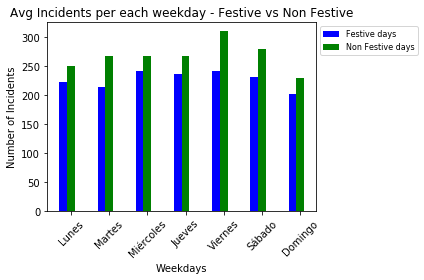

In [42]:
################################################GRAPHS AND RESULTS ########################

#### Plotting bar graphs using matplotlib library
#### Plotting number of incidents per each weekdays when it is Festive ( blue color) or not ( green color)

fig, ax = plt.subplots()
index = np.arange(len(incvial_av_dayfest["day_week"]))
bar_width = 0.2
opacity = 0.8
rects1 = plt.bar(index, incvial_av_dayfest["av_inc_fest"], width=0.2, color='b', align='center', label='Festive days')
rects2 = plt.bar(index + bar_width, incvial_av_dayfest["av_inc_non_fest"], width=0.2, color='g', align='center', label='Non Festive days')

plt.xlabel('Weekdays')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.title("Avg Incidents per each weekday - Festive vs Non Festive")
plt.xticks(index + bar_width, list(incvial_av_dayfest["day_week"]))
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [ ]:
############## Plotting pie graphs using matplotlib library

In [375]:
#### Calculating the average of incidents in festive period
incvial_av_dayfest["inc_fest"].sum()/incvial_av_dayfest["days_fest"].sum()

227.07394366197184

In [376]:
#### Calculating the average of incidents in non - festive period
incvial_av_dayfest["inc_non_fest"].sum()/incvial_av_dayfest["days_non_fest"].sum()

267.7269779507134

In [377]:
#### Calculating the average of incidents in whole period 
(incvial_av_dayfest["inc_non_fest"].sum() + incvial_av_dayfest["inc_fest"].sum())/(incvial_av_dayfest["days_non_fest"].sum() + incvial_av_dayfest["days_fest"].sum())

261.4041621029573

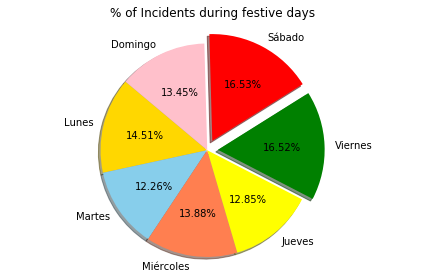

In [43]:
############################# Using matplotlib and plotting pie
############# Pie Graphs  % Incidents during festive days per each weekdays
#### inputs colors, explode 
#### incvial_av_dayfest["inc_fest"] = total number of incident per each weekdays during festive days
#### incvial_av_dayfest["day_week"] = Days of the week (Monday, Tuesday, etc )
colors =["gold","skyblue","coral","yellow","green","red","pink"]
explode = (0,0,0,0,0.1,0.1,0)
plt.pie(incvial_av_dayfest["inc_fest"], explode=explode, labels=incvial_av_dayfest["day_week"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Incidents during festive days")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("av_inc_fest_days.png")
plt.show()

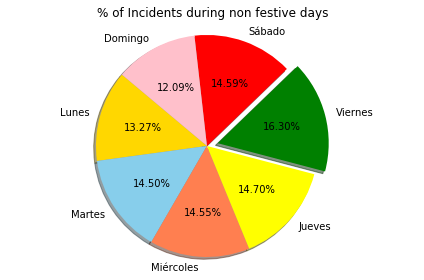

In [44]:
################# Pie Graph % Incidents during Non- festive days per each weekdays
#### inputs colors, explode 
#### incvial_av_dayfest["inc_non_fest"] = total number of incident per each weekdays during Non - festive days
#### incvial_av_dayfest["day_week"] = Days of the week (Monday, Tuesday, etc )

colors =["gold","skyblue","coral","yellow","green","red","pink"]
explode = (0,0,0,0,0.1,0,0)
plt.pie(incvial_av_dayfest["inc_non_fest"], explode=explode, labels=incvial_av_dayfest["day_week"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Incidents during non festive days")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("av_inc_non_fest_days.png")
plt.show()

In [ ]:
############### Calculating Number of Incidents on each "Delegacion"

In [45]:
##### Calculating Number of Incidents on each "Delegacion during Non- Festives Days

incvial_del_nonfest=incvial_dates[incvial_dates["festividad"]=="normal"].groupby("dia_semana")
incvial_del_nonfest_df=pd.DataFrame(incvial_del_nonfest["delegacion_inicio"].value_counts())
incvial_del_nonfest_df=incvial_del_nonfest_df.rename(columns={"delegacion_inicio":"count_inc"})
incvial_del_nonfest_df=incvial_del_nonfest_df.reset_index()
incvial_del_nonfest_df=incvial_del_nonfest_df.set_index("dia_semana")
np.unique(incvial_del_nonfest_df.index.values)
for day in np.unique(incvial_del_nonfest_df.index.values):
    print(incvial_del_nonfest_df.loc[day].head(3))

            delegacion_inicio  count_inc
dia_semana                              
Domingo            IZTAPALAPA       8277
Domingo     GUSTAVO A. MADERO       5615
Domingo            CUAUHTEMOC       5282
            delegacion_inicio  count_inc
dia_semana                              
Jueves             IZTAPALAPA       7944
Jueves             CUAUHTEMOC       7613
Jueves      GUSTAVO A. MADERO       6486
            delegacion_inicio  count_inc
dia_semana                              
Lunes              IZTAPALAPA       7936
Lunes              CUAUHTEMOC       6177
Lunes       GUSTAVO A. MADERO       6060
            delegacion_inicio  count_inc
dia_semana                              
Martes             IZTAPALAPA       8208
Martes             CUAUHTEMOC       7290
Martes      GUSTAVO A. MADERO       6451
            delegacion_inicio  count_inc
dia_semana                              
Miércoles          IZTAPALAPA       8016
Miércoles          CUAUHTEMOC       7282
Miércoles   GUST

In [46]:
##### Calculating Number of Incidents in each "Delegacion during - Festives Days

incvial_del_fest=incvial_dates[incvial_dates["festividad"]=="festivo"].groupby("dia_semana")
incvial_del_fest_df=pd.DataFrame(incvial_del_fest["delegacion_inicio"].value_counts())
incvial_del_fest_df=incvial_del_fest_df.rename(columns={"delegacion_inicio":"count_inc"})
incvial_del_fest_df=incvial_del_fest_df.reset_index()
incvial_del_fest_df=incvial_del_fest_df.set_index("dia_semana")
np.unique(incvial_del_fest_df.index.values)
for day in np.unique(incvial_del_fest_df.index.values):
    print(incvial_del_fest_df.loc[day].head(3))

            delegacion_inicio  count_inc
dia_semana                              
Domingo            IZTAPALAPA       1463
Domingo     GUSTAVO A. MADERO       1000
Domingo            CUAUHTEMOC        919
            delegacion_inicio  count_inc
dia_semana                              
Jueves             IZTAPALAPA       1133
Jueves             CUAUHTEMOC        998
Jueves      GUSTAVO A. MADERO        918
            delegacion_inicio  count_inc
dia_semana                              
Lunes              IZTAPALAPA       1240
Lunes              CUAUHTEMOC       1129
Lunes       GUSTAVO A. MADERO       1066
            delegacion_inicio  count_inc
dia_semana                              
Martes             IZTAPALAPA       1062
Martes             CUAUHTEMOC        970
Martes      GUSTAVO A. MADERO        816
            delegacion_inicio  count_inc
dia_semana                              
Miércoles          IZTAPALAPA       1275
Miércoles          CUAUHTEMOC       1136
Miércoles   GUST